In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
!pip install -U kaleido

In [4]:
pio.renderers.default = 'svg'

In [5]:
df = pd.read_csv("Employee_Atrition.csv")

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [9]:
df['EmployeeCount'].nunique()

1

In [10]:
df = df.drop('EmployeeCount', axis = 1)

In [11]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [12]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [13]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [14]:
data = df.copy()

In [15]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data['Attrition'] = data['Attrition'].replace('Yes', 1).replace('No', 0)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

[Text(0, 0, '237'), Text(0, 0, '1233')]

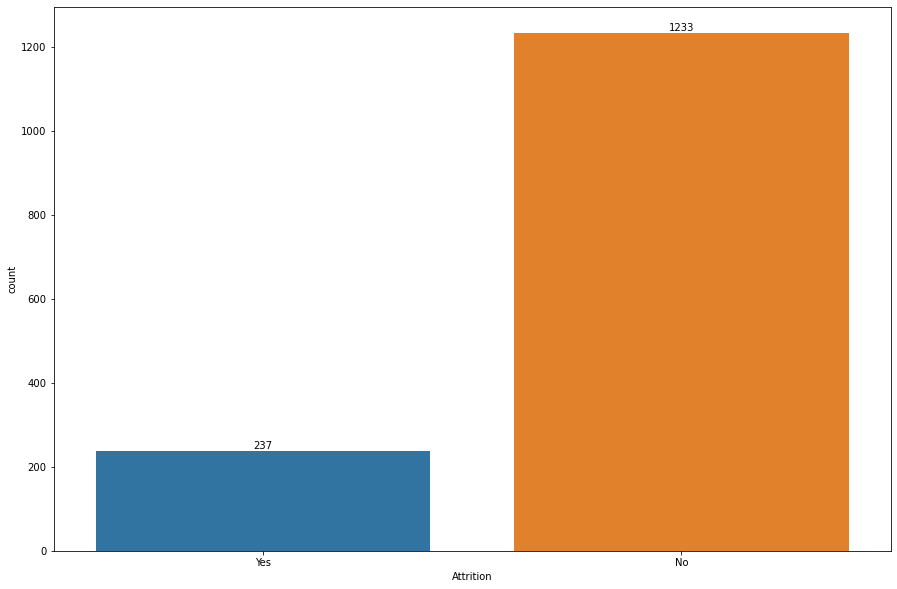

In [18]:
plt.figure(figsize = (15,10))
ax = sns.countplot(df['Attrition'])
ax.bar_label(ax.containers[0])

In [19]:
data.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Name: Attrition, dtype: float64

In [20]:
new_df = data.loc[:, ['Age', 'Attrition','BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                     'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                     'MonthlyIncome','Over18','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany',
                     'YearsInCurrentRole','YearsWithCurrManager']]

In [21]:
new_df.head()

Age  Attrition     BusinessTravel              Department EducationField  \
0   41          1      Travel_Rarely                   Sales  Life Sciences   
1   49          0  Travel_Frequently  Research & Development  Life Sciences   
2   37          1      Travel_Rarely  Research & Development          Other   
3   33          0  Travel_Frequently  Research & Development  Life Sciences   
4   27          0      Travel_Rarely  Research & Development        Medical   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
0                        2  Female               3         2   
1                        3    Male               2         2   
2                        4    Male               2         1   
3                        4  Female               3         1   
4                        1    Male               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome Over18  \
0        Sales Executive                4        Single           5993      Y   
1     Research Scientist                2       Married           5130      Y   
2  Laboratory Technician                3        Single           2090      Y   
3     Research Scientist                3       Married           2909      Y   
4  Laboratory Technician                2       Married           3468      Y   

  OverTime  StockOptionLevel  TotalWorkingYears  YearsAtCompany  \
0      Yes                 0                  8               6   
1       No                 1                 10              10   
2      Yes                 0                  7               0   
3      Yes                 0                  8               8   
4       No                 1                  6               2   

   YearsInCurrentRole  YearsWithCurrManager  
0                   4                     5  
1                   7                     7  
2                   0                     0  
3                   7                     0  
4                   2                     2

In [22]:
## missing values and duplicated check
new_df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
Over18                     0
OverTime                   0
StockOptionLevel           0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsWithCurrManager       0
dtype: int64

In [23]:
new_df.duplicated().sum()

0

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  Over18                   1470 non-null   object
 14  OverTime                 1470 non-null  

- Describe All Numerical Column

In [25]:
Nums = ['Age','Attrition','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
       'StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']

In [26]:
new_df[Nums].describe()

Age    Attrition  EnvironmentSatisfaction  JobInvolvement  \
count  1470.000000  1470.000000              1470.000000     1470.000000   
mean     36.923810     0.161224                 2.721769        2.729932   
std       9.135373     0.367863                 1.093082        0.711561   
min      18.000000     0.000000                 1.000000        1.000000   
25%      30.000000     0.000000                 2.000000        2.000000   
50%      36.000000     0.000000                 3.000000        3.000000   
75%      43.000000     0.000000                 4.000000        3.000000   
max      60.000000     1.000000                 4.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome  StockOptionLevel  \
count  1470.000000      1470.000000    1470.000000       1470.000000   
mean      2.063946         2.728571    6502.931293          0.793878   
std       1.106940         1.102846    4707.956783          0.852077   
min       1.000000         1.000000    1009.000000          0.000000   
25%       1.000000         2.000000    2911.000000          0.000000   
50%       2.000000         3.000000    4919.000000          1.000000   
75%       3.000000         4.000000    8379.000000          1.000000   
max       5.000000         4.000000   19999.000000          3.000000   

       TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
count        1470.000000     1470.000000         1470.000000   
mean           11.279592        7.008163            4.229252   
std             7.780782        6.126525            3.623137   
min             0.000000        0.000000            0.000000   
25%             6.000000        3.000000            2.000000   
50%            10.000000        5.000000            3.000000   
75%            15.000000        9.000000            7.000000   
max            40.000000       40.000000           18.000000   

       YearsWithCurrManager  
count           1470.000000  
mean               4.123129  
std                3.568136  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

### Univariate Analysis Numerical Column

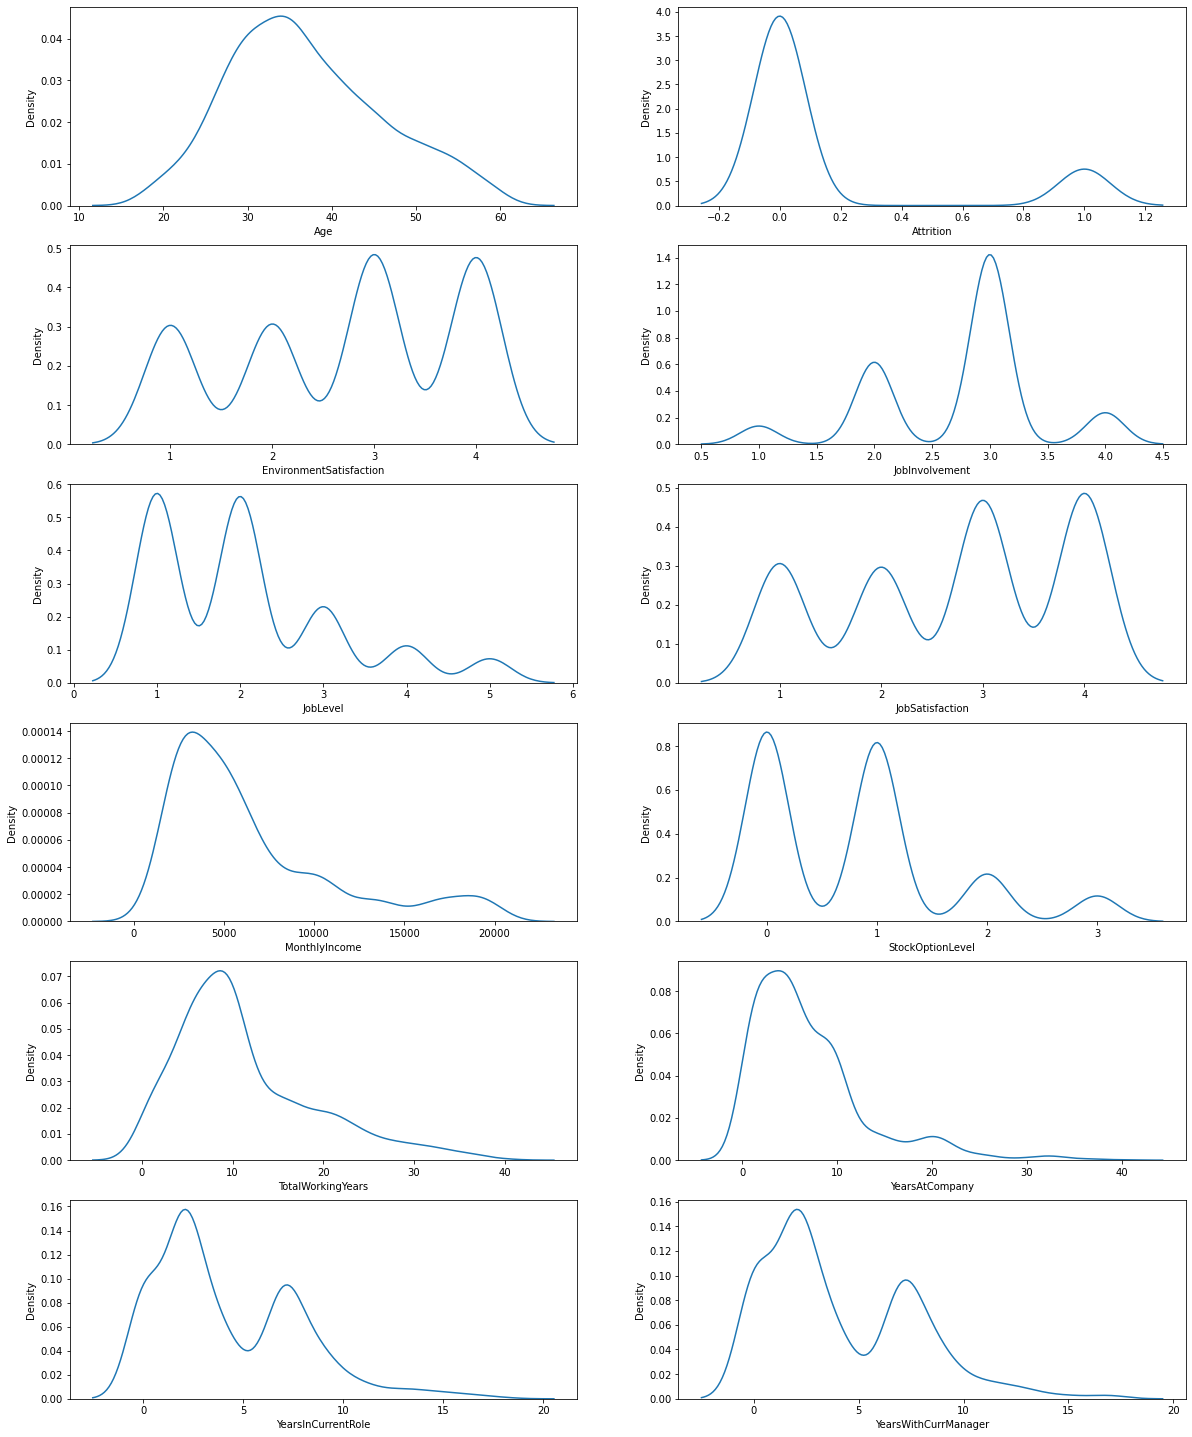

In [27]:
plt.figure(figsize=(20,30))
for i in range(len(Nums)):
    plt.subplot(7,2, i+1)
    sns.kdeplot(x = new_df[Nums[i]])

- Describe All Categorical Column

In [28]:
Cats = ['BusinessTravel','Department','EducationField','Gender','JobRole','Over18','OverTime']

In [29]:
new_df[Cats].describe()

BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

                JobRole Over18 OverTime  
count              1470   1470     1470  
unique                9      1        2  
top     Sales Executive      Y       No  
freq                326   1470     1054

- 70.9% Worker Rarely Travel
- 65.3% Worker is from R&D Department
- 41% Worker Education Field background is Life Sciences
- All Worker Over 18
- 71% Worker not working Over Time

In [30]:
# Over 18 Column gonna be drop

In [31]:
new_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

### Univariate Analysis Categorical Column

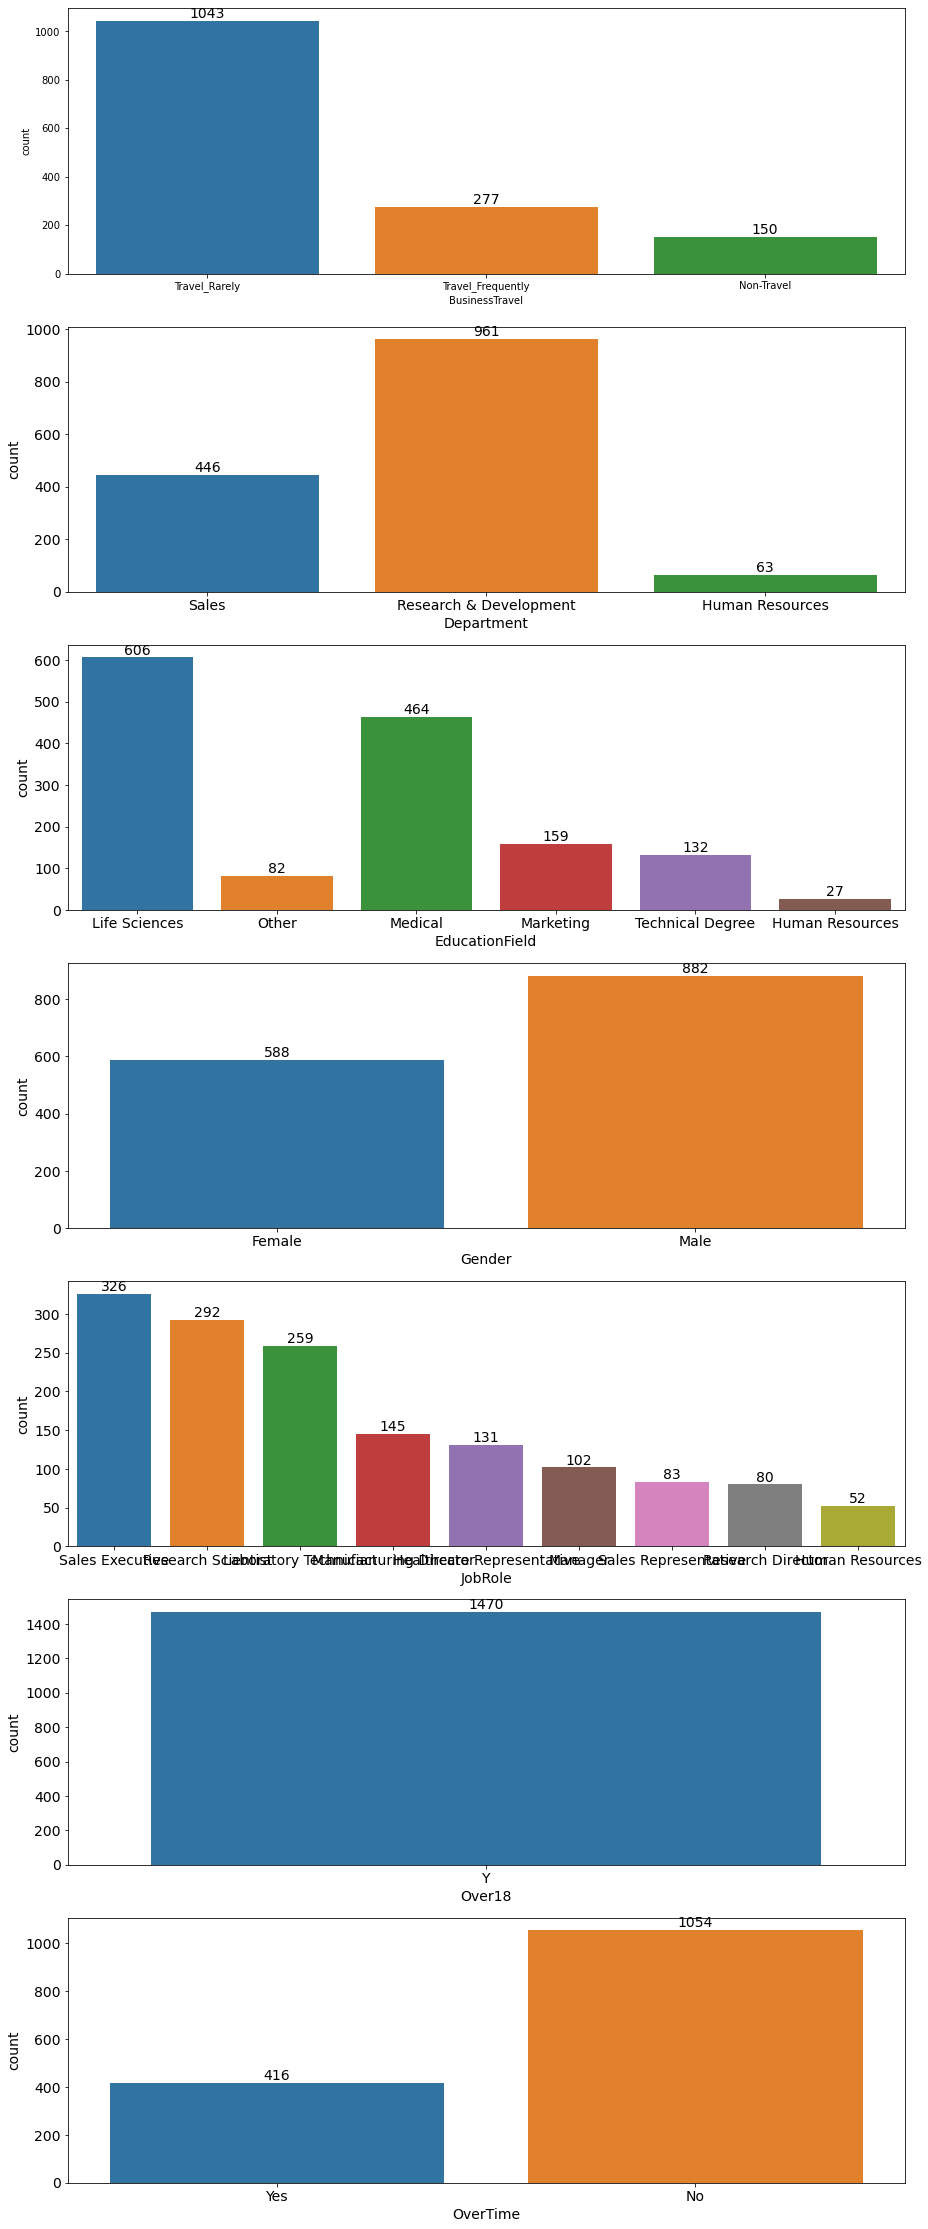

In [32]:

plt.figure(figsize=(15,40))
for i in range(len(Cats)):
    plt.subplot(7,1, i+1)
    MEDIUM_SIZE = 14
    plt.rc('font', size=MEDIUM_SIZE)
    ax = sns.countplot(x=new_df[Cats[i]])
    ax.bar_label(ax.containers[0])
    

## Drop and Standardizing the Data

In [33]:
a = new_df['TotalWorkingYears'].unique()

In [34]:
print(sorted(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40]


In [35]:
new_df['TotalWorkingYears'].nunique()

40

In [36]:
new_df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [37]:
new_df['YearsAtCompany'].nunique()

37

In [38]:
new_df['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [39]:
new_df['YearsInCurrentRole'].nunique()

19

In [40]:
new_df['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

In [41]:
new_df['YearsWithCurrManager'].nunique()

18

In [42]:
new_df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [43]:
new_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [44]:
new_df = new_df.drop('Over18', axis = 1)

In [45]:
new_df.loc[new_df['JobRole'].isin(['Sales Executive', 'Sales Representative']), 'JobRole'] = 'Sales_Group'

In [46]:
new_df.loc[new_df['JobRole'].isin(['Research Scientist', 'Laboratory Technician','Healthcare Representative']), 'JobRole'] = 'Health_Group'

In [47]:
new_df.loc[new_df['JobRole'].isin(['Research Scientist', 'Laboratory Technician','Healthcare Representative']), 'JobRole'] = 'Health_Group'

In [48]:
new_df.loc[new_df['JobRole'].isin(['Manufacturing Director', 'Research Director']), 'JobRole'] = 'Director_Group'

In [49]:
new_df.loc[new_df['EducationField'].isin(['Human Resources', 'Other']), 'EducationField'] = 'HR + Others'

In [50]:
new_df['JobRole'].unique()

array(['Sales_Group', 'Health_Group', 'Director_Group', 'Manager',
       'Human Resources'], dtype=object)

In [51]:
dodi = new_df.copy()

In [52]:
conditions = [(dodi['Age'] >= 18) & (dodi['Age'] <= 20),
              (dodi['Age'] > 20) & (dodi['Age'] <= 25),
              (dodi['Age'] > 25) & (dodi['Age'] <= 30),
              (dodi['Age'] > 30) & (dodi['Age'] <= 35),
              (dodi['Age'] > 35) & (dodi['Age'] <= 40),
              (dodi['Age'] > 40) & (dodi['Age'] <= 45),
              (dodi['Age'] > 45) & (dodi['Age'] <= 50),
              (dodi['Age'] > 50) & (dodi['Age'] <= 55),
              (dodi['Age'] > 55) & (dodi['Age'] <= 60)
             ]

values = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60']

new_df['Age_Range'] = np.select(conditions, values)

In [53]:
Cats = ['BusinessTravel','Department','EducationField','Gender','JobRole','OverTime']

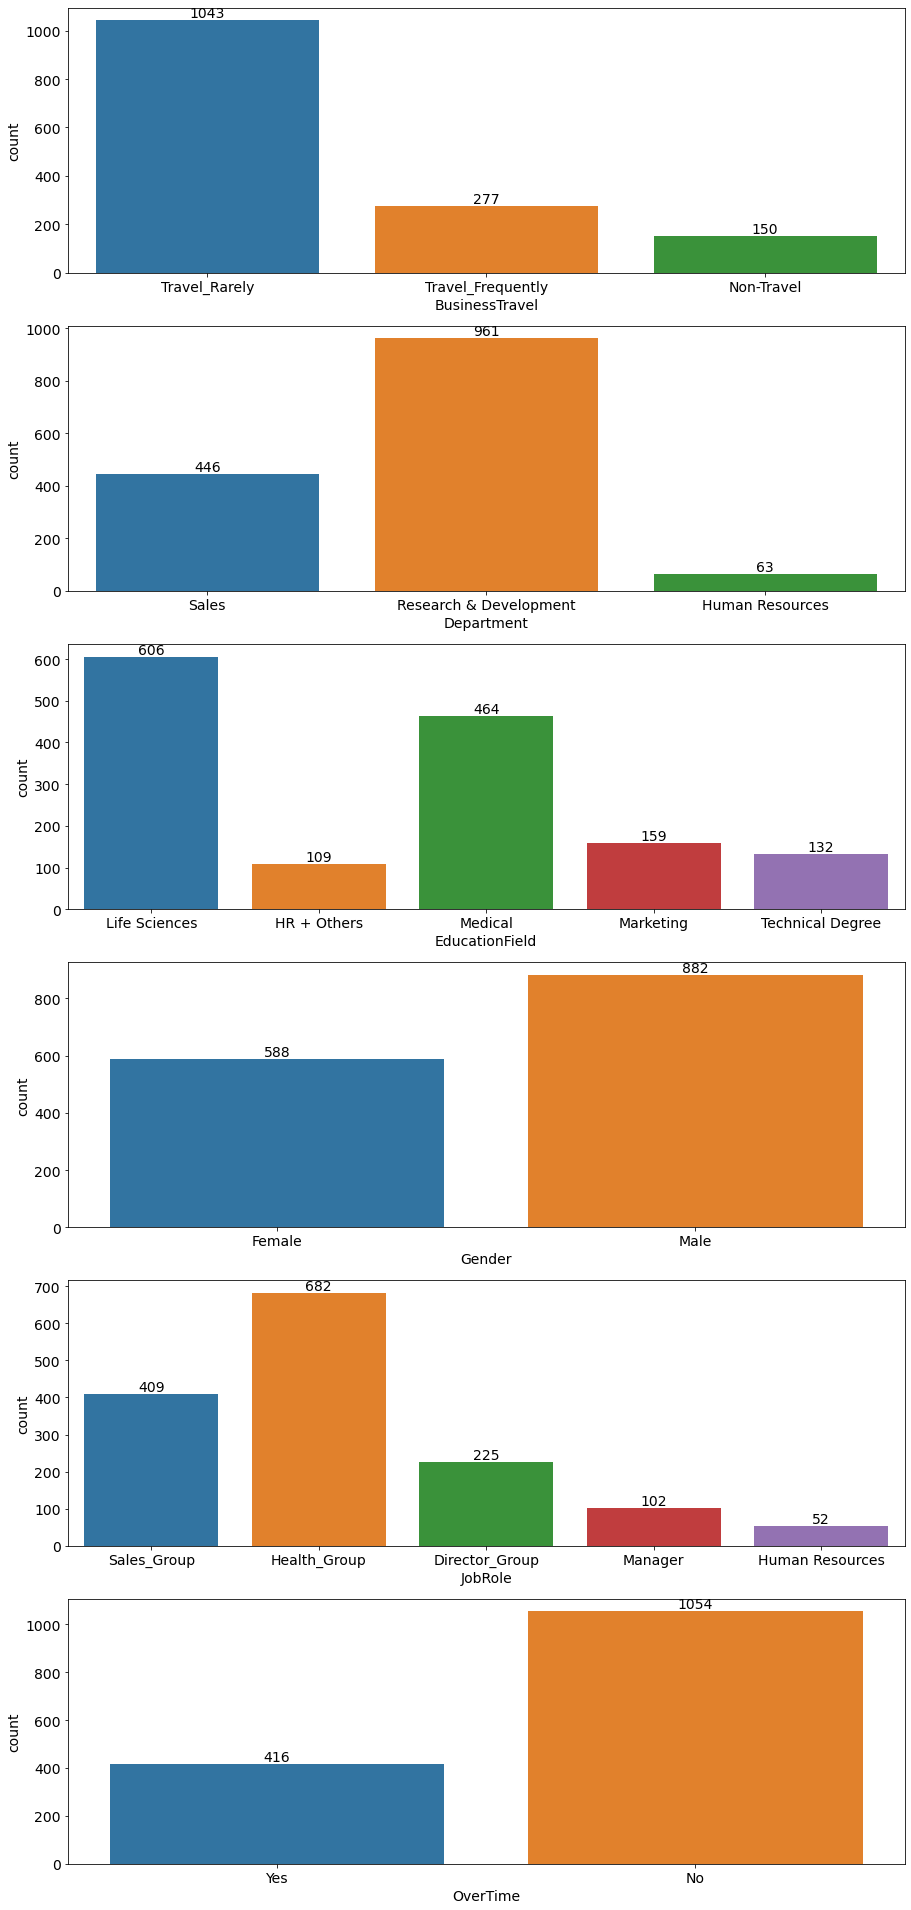

In [54]:
## New Univariate

plt.figure(figsize=(15,40))
for i in range(len(Cats)):
    plt.subplot(7,1, i+1)
    MEDIUM_SIZE = 14
    plt.rc('font', size=MEDIUM_SIZE)
    ax = sns.countplot(x=new_df[Cats[i]])
    ax.bar_label(ax.containers[0])

In [55]:
# Bivariate Analysis

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  StockOptionLevel         1470 non-null  

# Question

## Does Business Travel Have Impact on Attrition?

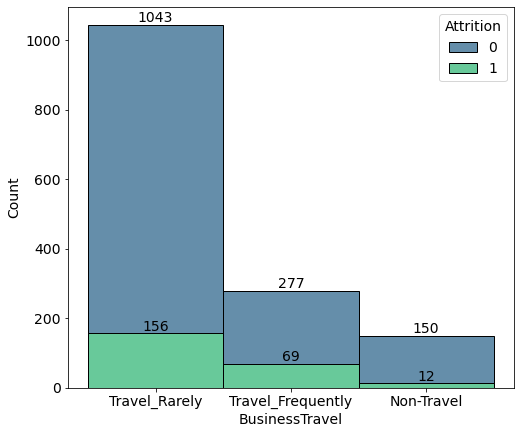

In [57]:
f, ax = plt.subplots(1, figsize = (8,7))
sns.histplot(new_df, x = 'BusinessTravel', hue = 'Attrition', multiple = 'stack', palette = 'viridis', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

- Employees who Travel Frequently are proven to have a greater Tendency to `Attrition`, this statement supported by the data, that said around (69 out of 277 Employees) or 25% of the total Employees who Travel Frequently.

- Meanwhile for Employee that Rarely Travel, Percentage of `Attrition` dropping down, from 25% to 15%, there's 10% difference.
- Last, for Employee that Never Travel, Percentage of `Attrition` dropping again, and its only 1/3 from Employee that Frequently Travel, from 25% to 8%, its amazing drop

**NOTE** : Although we can see, from the chart that Employee who Rarely Travel have more Quantity in terms of Attrion compare to Employee Frequently Travel, but this is a *misunderstanding*, because the percentage of 'Attrition' is higher high for employees who frequently travel even though in this data only 69 people or 4.6% of the total number of employees.

However, If:
*Total Employees who Travel Frequently = Total Employees who Rarely Travel*

**Then, there will be (25% x 1043 = 260) Employees who (Travel Frequently) that tend to do `Attrition`**

## Tendency to do Attrition, Comparison with Each Department

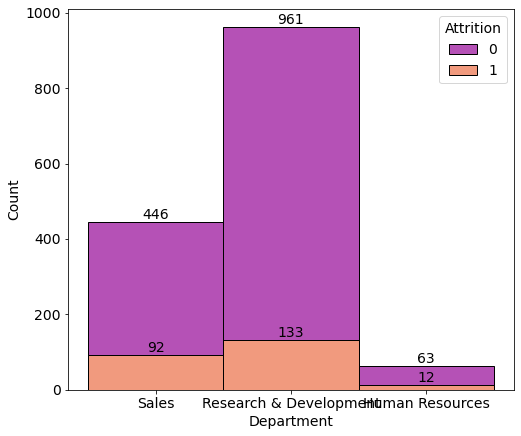

In [58]:
f, ax = plt.subplots(1, figsize = (8,7))
sns.histplot(new_df, x = 'Department', hue = 'Attrition', multiple = 'stack', palette = 'plasma', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

- Sales Department has an `Attrition` tendency of 20%
- The R & D department has an `Attrition` tendency of 13.8%
- The HR department has an `Attrition` tendency of 19%

Unique isn't it? The department that looks the most out of the total employees `133/1470` or `9%`, turns out to have a smaller `Attrition` tendency

## What is Education Background of the Employee who decides to Attrition?

In [59]:
df_blu = df.sort_values('EducationField')

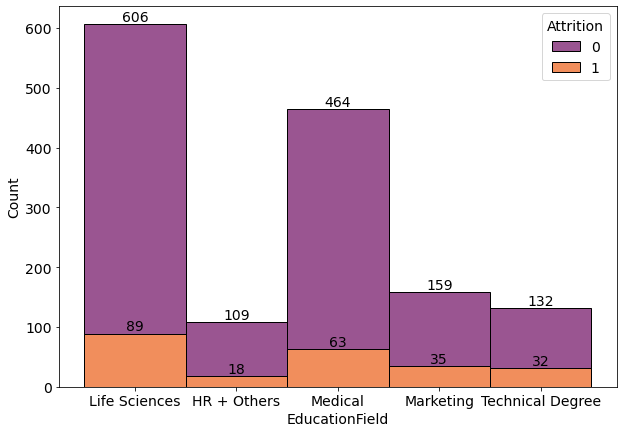

In [60]:
f, ax = plt.subplots(1, figsize = (10,7))
sns.histplot(new_df, x = 'EducationField', hue = 'Attrition', multiple = 'stack', palette = 'inferno', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

- Life and Sciences has an Attrition tendency of 14.6%
- HR + Others have an Attrition tendency of 16.5%
- Medical has a tendency of Attrition of 13.5%
- Marketing has an Attrition tendency of 22%
- Technical Degree has an Attrition tendency of 24%

This tendency seems normal, looks like **Education Background doesn't really affect** the decision of Employee to do Attrition

## What Gender have the most Attrition Tendency?

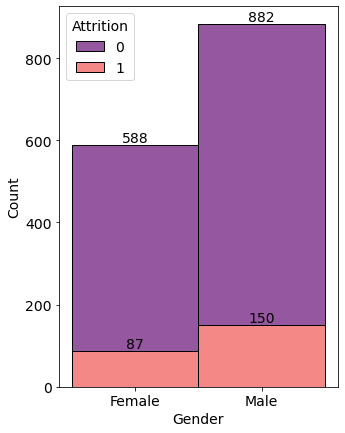

In [61]:
f, ax = plt.subplots(1, figsize = (5,7))
ax = sns.histplot(new_df, x = 'Gender', hue = 'Attrition', multiple = 'stack', palette = 'magma', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

- Female has an Attrition tendency of 14.7%
- Male has an Attrition tendency of 17%

From this data, we can conclude that Gender has nothing to do with Attrition Decision

## Tendency to do Attrition, Comparison with Every Job Role

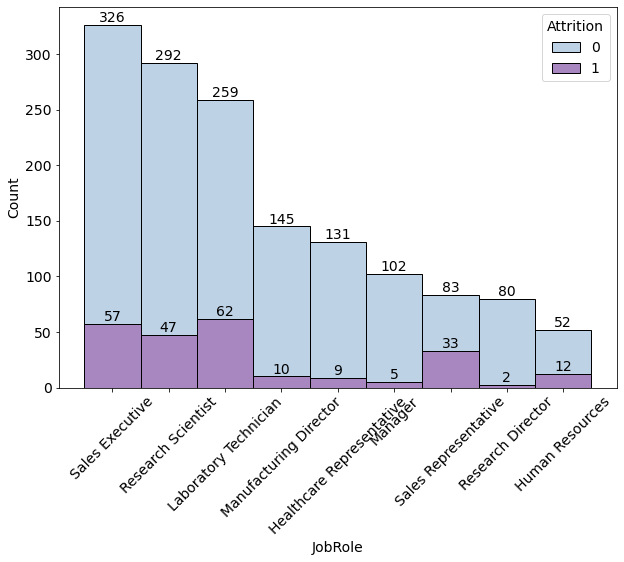

In [62]:
f, ax = plt.subplots(1, figsize = (10,7))
sns.histplot(data, x = 'JobRole', hue = 'Attrition', multiple = 'stack', palette = 'BuPu', ax=ax)
for container in ax.containers:
    ax.bar_label(container) 
    ax.tick_params(axis='x', rotation=45)

Tendency to Attrition on a percentage Basis, Comparison with Their Job Role : 
- Sales Executive by 17%
- Research Scientist by 16%
- Laboratory Technician by 23%
- Manufacturing Director of 6.8%
- Healthcare Representative of 6.8%
- Managers by 4.8%
- Sales Representative of 39%
- Research Director of 2.5%
- HR of 23%

## Distribution of Attrition based on Job Role

In [63]:
data_neg = data[data['Attrition'] == 1]

In [64]:
ngide = data_neg.groupby(data_neg['JobRole'], as_index=False).size()
ngide = ngide.sort_values(['size'], ascending=False)

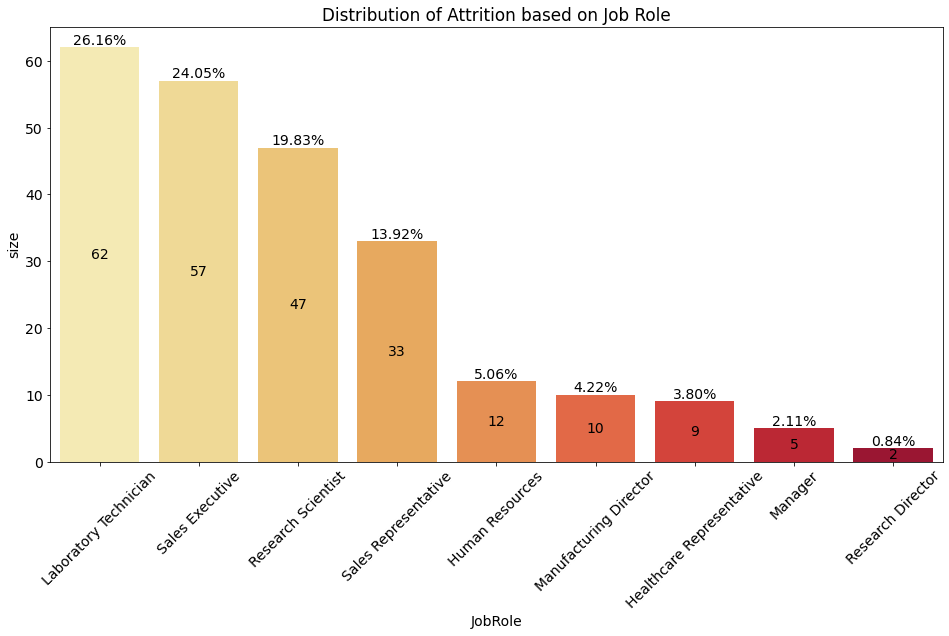

In [65]:
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=ngide['JobRole'], y = ngide['size'], ax=ax, palette = 'YlOrRd')
ax.set(title="Distribution of Attrition based on Job Role")

total = ngide['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')
    ax.tick_params(axis='x', rotation=45)

## Tendency to do Attrition, based on Marital Status

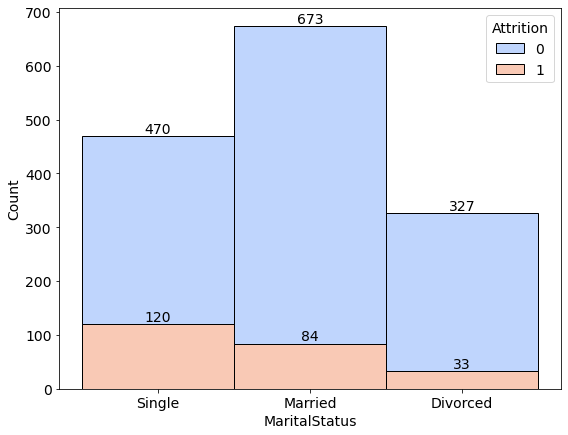

In [66]:
f, ax = plt.subplots(1, figsize = (9,7))
sns.histplot(new_df, x = 'MaritalStatus', hue = 'Attrition', multiple = 'stack', palette = 'coolwarm', ax=ax)

for container in ax.containers:
    ax.bar_label(container)

- Single Employee have 25% Tendency to do Attrition
- Married Employee have 12.4% Tendency to do Attrition
- Divorced Employee have 10% Tendency to do Attrition

The tendency for Attrition is owned by employees whose workload is still small or still single, for employees who are married the percentage of attrition decreases by 50% compared to employees who are still single. Then divorced employees have a smaller percentage than those who are married

## Tendency to do Attrition based on OverTime or Not while Work

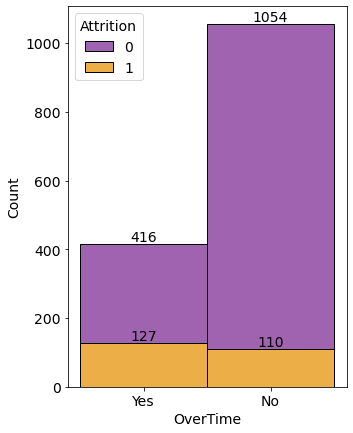

In [67]:
f, ax = plt.subplots(1, figsize = (5,7))
sns.histplot(new_df, x = 'OverTime', hue = 'Attrition', multiple = 'stack', palette = 'CMRmap', ax=ax)
for container in ax.containers:
    ax.bar_label(container)

- Overtime by 30%
- No Overtime by 10.4%

This time working hours have a significant impact on an employee's decision whether to do Attrition or not, as evidenced by employees who work OverTime have a percentage for Attrition 20% higher than those who don't

In [68]:
colores = ['orange', 'navy', 'tomato', 'crimson', 'darkgreen', 'brown',
               'forestgreen', 'steelblue', 'deeppink', 
               'darkorange', 'palegreen', 'gold', 'darkviolet']

In [69]:
df_umur = new_df.sort_values('Age_Range')

In [70]:
Attrition = new_df[new_df['Attrition'] == 1]

In [71]:
sorted_age = Attrition.sort_values('Age_Range')

In [72]:
def barplot_values_percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.2 #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+0.2 #adjust the numbers (higher numbers = up, lower = down)
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=16,color='#645CBB')

In [73]:
new_df.corr()['Attrition']

Age                       -0.159205
Attrition                  1.000000
EnvironmentSatisfaction   -0.103369
JobInvolvement            -0.130016
JobLevel                  -0.169105
JobSatisfaction           -0.103481
MonthlyIncome             -0.159840
StockOptionLevel          -0.137145
TotalWorkingYears         -0.171063
YearsAtCompany            -0.134392
YearsInCurrentRole        -0.160545
YearsWithCurrManager      -0.156199
Name: Attrition, dtype: float64

In [74]:
ngawur = sorted_age.groupby(sorted_age['Age_Range'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=False)

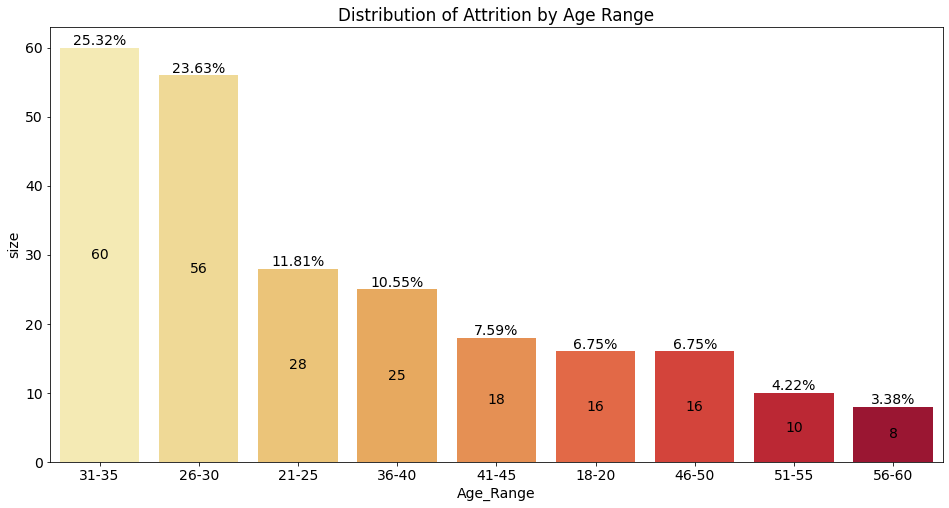

In [75]:
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=ngawur['Age_Range'], y = ngawur['size'], ax=ax, palette = 'YlOrRd')
ax.set(title="Distribution of Attrition by Age Range")

total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

- First Position on the Distribution of Attrition Employee is Group Age `31-35` with 25% from All Employee that decided to Attrition
- Second Place is Group Age `26-30` with only 2% slight difference
- Apart from the `18-20` Group Age, All Group Age > 40 Years have Attrition percentage below 10%


In [76]:
ngawur = sorted_age.groupby(sorted_age['YearsInCurrentRole'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=True)

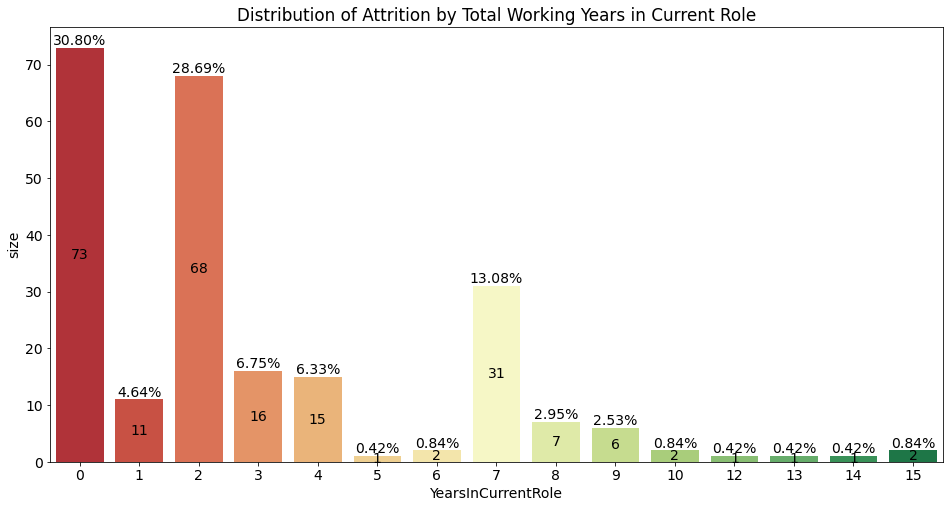

In [77]:
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=ngawur['YearsInCurrentRole'], y = ngawur['size'], ax=ax, palette = 'RdYlGn')
ax.set(title="Distribution of Attrition by Total Working Years in Current Role")

total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

In [78]:
ngawur = sorted_age.groupby(sorted_age['YearsAtCompany'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=True)

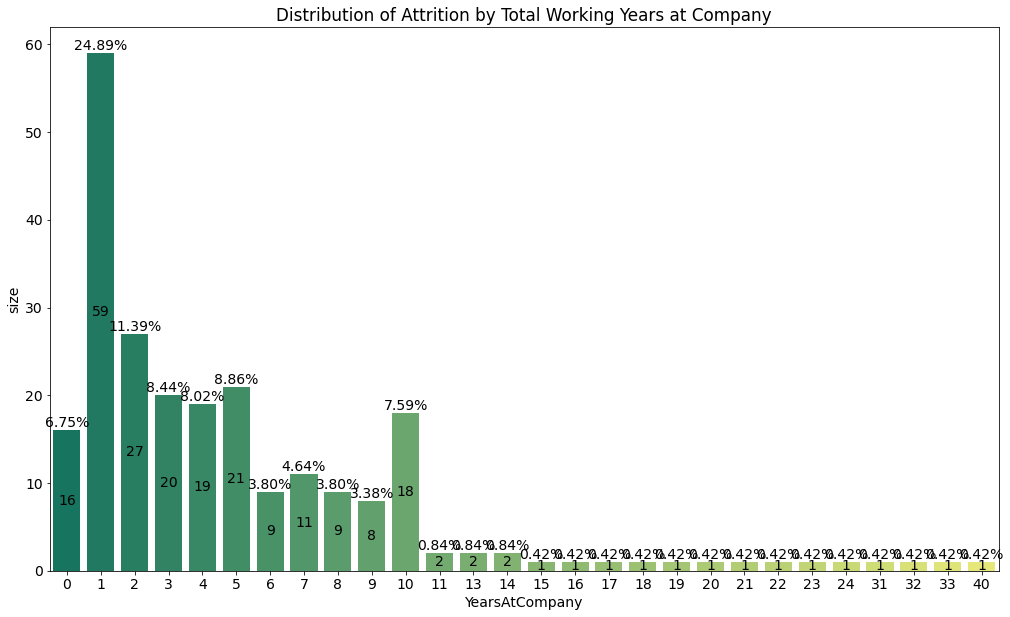

In [79]:
f, ax = plt.subplots(1, figsize=(17,10))
bars = sns.barplot(x=ngawur['YearsAtCompany'], y = ngawur['size'], ax=ax, palette = 'summer')
ax.set(title="Distribution of Attrition by Total Working Years at Company")
plt.title("Distribution of Attrition by Total Working Years at Company")
total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')
plt.show()

- In 0th year of Work, Number of Employee that decided to Attrition is not that big, `just a little over 5%` from total All Attrition Employees
- In the 1st year of working at the company, the number of employees that decided to Attrition is very high until reached `24.89%` of the total all Attrition Employees
- Year 2 Attrition decreased significantly to 11.39%
- After the 2nd year, the distribution of employees Attrition is always below 10%
- There is an Unusual Increase in Attrition in Year 10 of working at the Company

Conclusion :
1. If an Employee lasts at least the first 2 years at the Company, the possibility of Attrition for that Employee will decrease
2. Employees who decided to Stay at least the first 2 Years will work at least until their 10th Year
3. Employees who decided to not do Attrition in their 10th Year, have a very small chance of Attrition

In [80]:
ngawur = sorted_age.groupby(sorted_age['TotalWorkingYears'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=True)

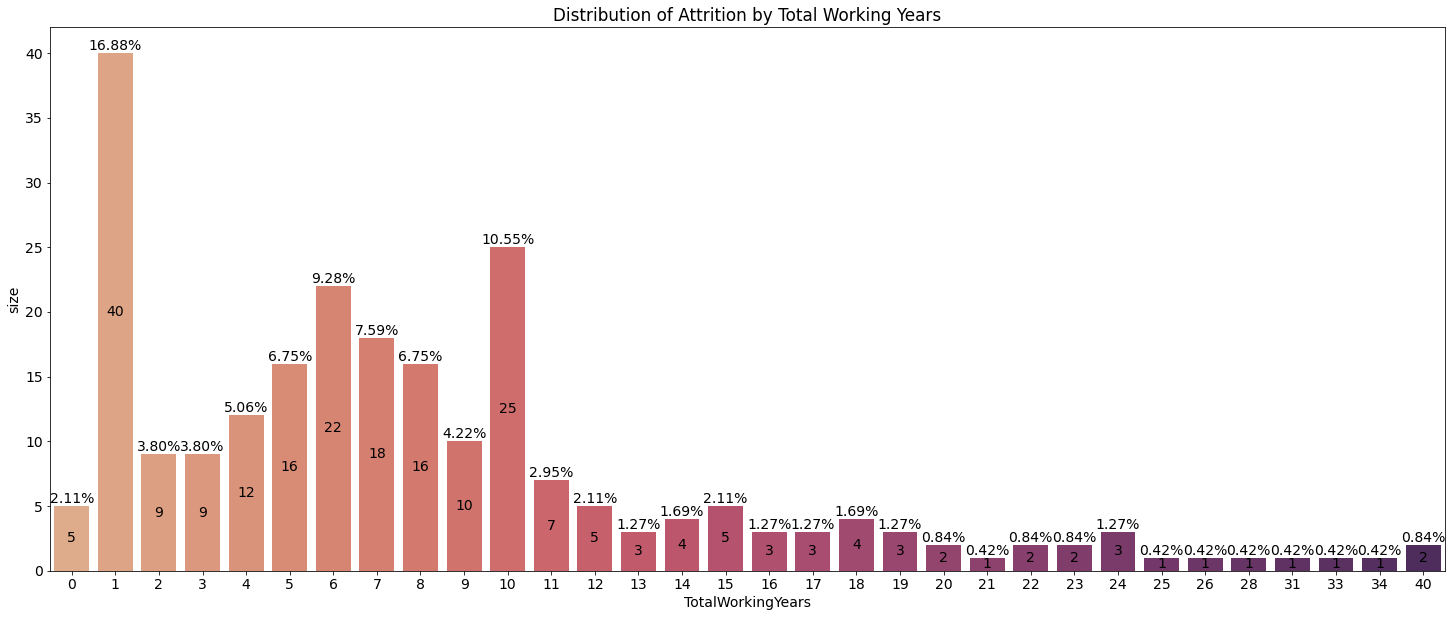

In [81]:
f, ax = plt.subplots(1, figsize=(25,10))
bars = sns.barplot(x=ngawur['TotalWorkingYears'], y = ngawur['size'], ax=ax, palette = 'flare')
ax.set(title="Distribution of Attrition by Total Working Years")

total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

- Year 1 Work dominated the distribution of Attrition, amounting to 16.8%, after that the graph decreased significantly
- There is a sizeable increase in Attrition in Years 6 and 10
- Employees who have worked for more than 10 years have a very small possibility of Attrition

In [82]:
ngawur = sorted_age.groupby(sorted_age['JobLevel'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=True)

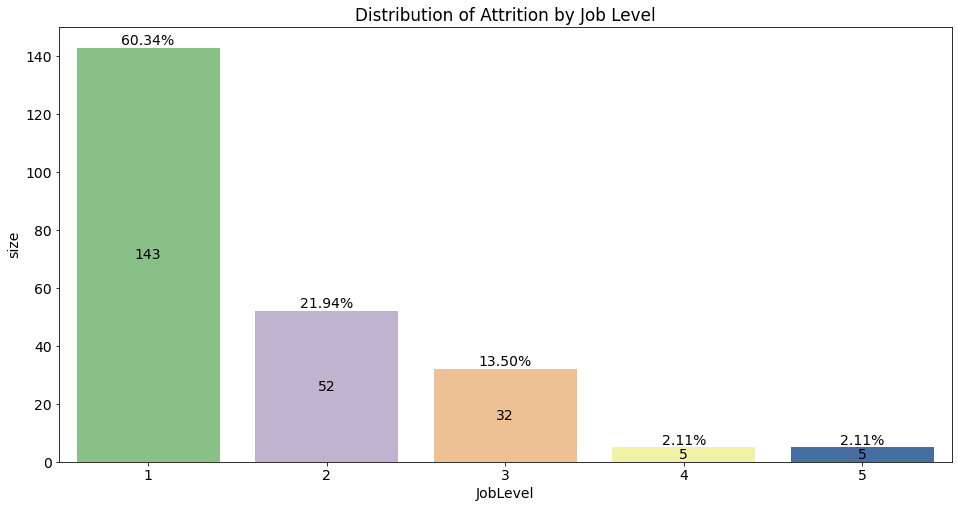

In [83]:
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=ngawur['JobLevel'], y = ngawur['size'], ax=ax, palette = 'Accent')
ax.set(title="Distribution of Attrition by Job Level")

total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

- Employees with Job Level 1 (Entry Level), dominate the distribution of Attrition reaching 60%,

`Notes`: Job Level 1, is the level for Entry Level / Fresh Graduate, meaning that it is possible that young people dominate this level
- Employees with Job Level 2 (Intermediate) still have a rather decent amount of around 21%
- Employees who reach Job Level 4 and 5, have a very small possibility of Attrition

In [84]:
ngawur = sorted_age.groupby(sorted_age['JobSatisfaction'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=True)

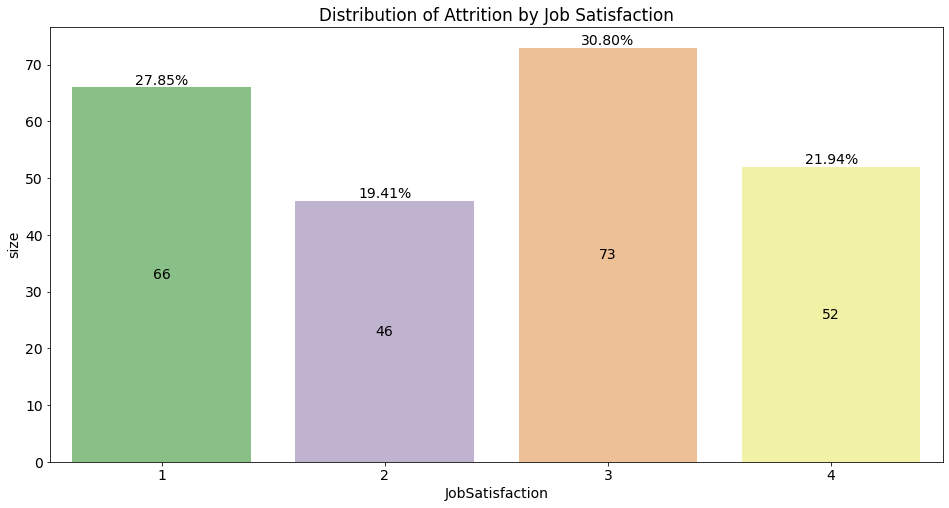

In [85]:
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=ngawur['JobSatisfaction'], y = ngawur['size'], ax=ax, palette = 'Accent')
ax.set(title="Distribution of Attrition by Job Satisfaction")

total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

- Job Satisfaction has a fairly even distribution, and doesn't really affect Attrition decisions

In [86]:
ngawur = sorted_age.groupby(sorted_age['EnvironmentSatisfaction'], as_index=False).size()
ngawur = ngawur.sort_values(['size'], ascending=True)

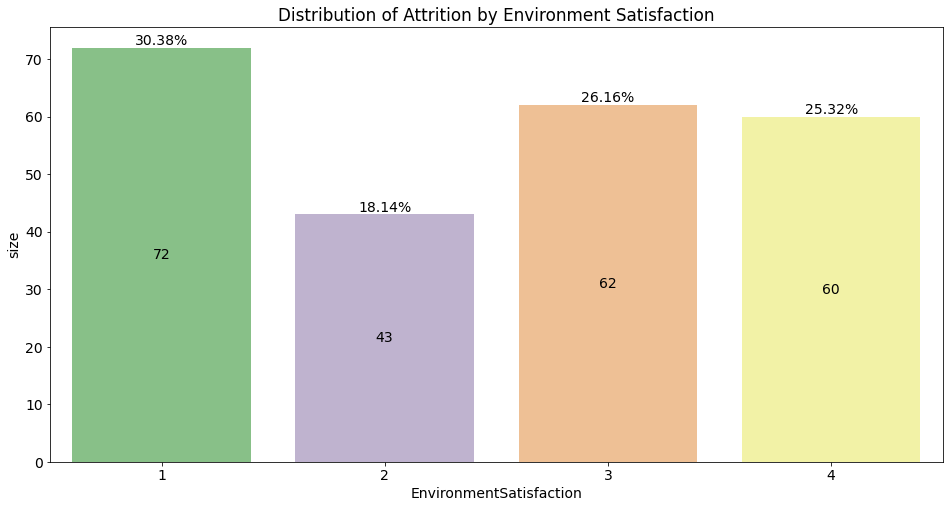

In [87]:
f, ax = plt.subplots(1, figsize=(16,8))
bars = sns.barplot(x=ngawur['EnvironmentSatisfaction'], y = ngawur['size'], ax=ax, palette = 'Accent')
ax.set(title="Distribution of Attrition by Environment Satisfaction")

total = ngawur['size'].sum()
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '{:.2%}'.format(height/total), ha='center', va='bottom')
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

- Environment Satisfaction has a fairly even distribution, and does not really affect Attrition decisions

In [88]:
Stay = new_df[new_df['Attrition'] == 0]

**Note** : How to Read

Trendline = Representative of Data / Average

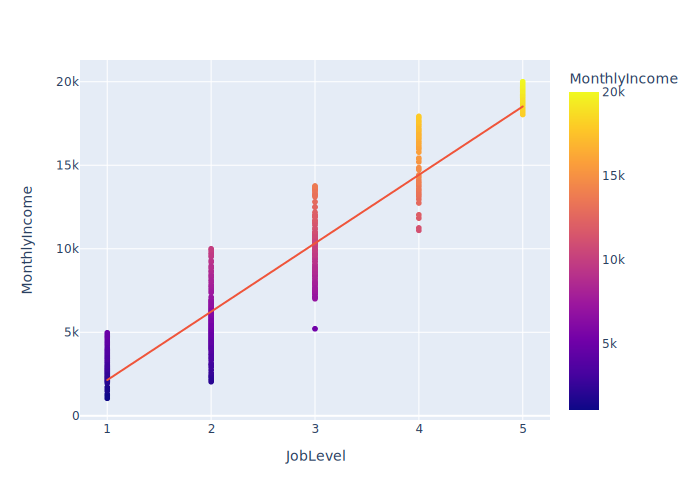

In [89]:
fig = px.scatter(Stay, x = "JobLevel", y = "MonthlyIncome", color = 'MonthlyIncome', trendline = 'ols')
fig.show()

**Average Income of Employees that Stay based on Job Level**
- Employee with Job Level 1, 2140, with a fraction below average
- Employee with Job Level 2, 6235 with a percentage of 50:50 
- Employee with Job Level 3, 10300, with a percentage of 50:50 
- Employee with Job Level 4, 14400, with a percentage of 50:50
- Employee with Job Level 5, 18500, with a few below average

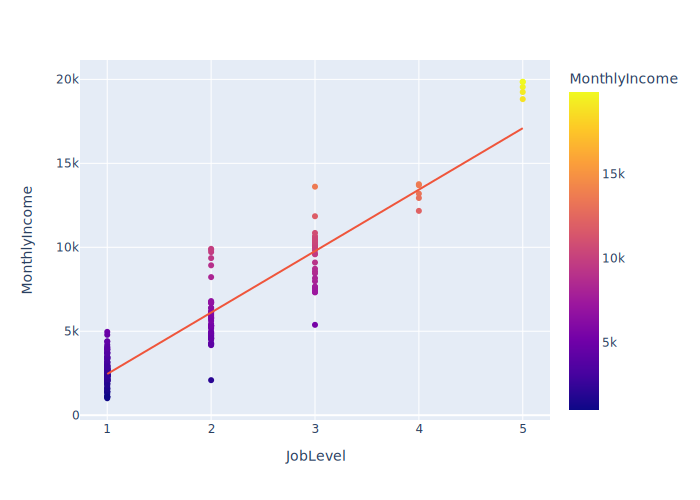

In [90]:
fig = px.scatter(Attrition, x = "JobLevel", y = "MonthlyIncome", color = 'MonthlyIncome', trendline = 'ols')
fig.show()

**Average Income of Employees that Leave based on Job Level**
- Employee with Job Level 1, 2455, with a percentage of 50:50
- Employee with Job Level 2, 6114 with most being below average
- Employee with Job Level 3, 9774, with a percentage of 50:50
- Employee with Job Level 4, 13400, with most being below average
- Employee with Job Level 5, 17000, with all employees above average

[Text(0.5, 1.0, 'Distribution Income of Employee that Leave based on Job Level')]

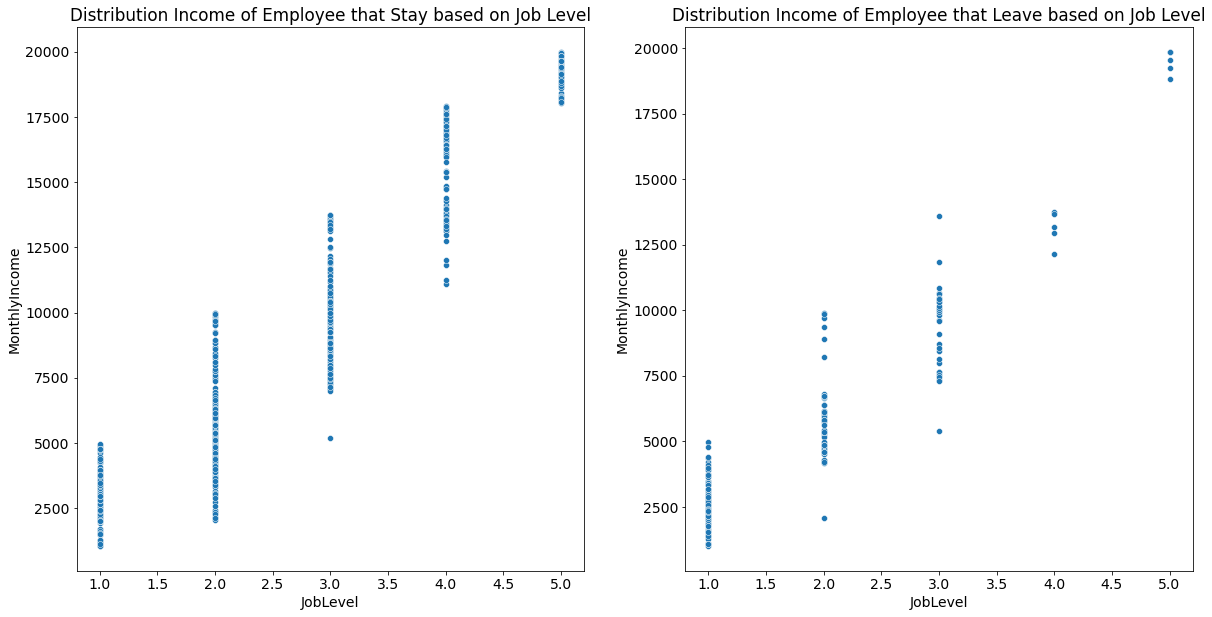

In [91]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(x="JobLevel", 
               y = "MonthlyIncome",
               data = Stay, ax=ax[0]).set(title="Distribution Income of Employee that Stay based on Job Level")
sns.scatterplot(x="JobLevel", 
               y = "MonthlyIncome",
               data = Attrition, ax=ax[1]).set(title="Distribution Income of Employee that Leave based on Job Level")


## Deep Dive Analysis Monthly Income vs Job Level

In [92]:
Level1 = Attrition[Attrition['JobLevel'] == 1]

In [93]:
Level1Inc = Level1[Level1['MonthlyIncome'] <= 2439]

In [94]:
Level1Inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 2 to 1444
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      73 non-null     int64 
 1   Attrition                73 non-null     int64 
 2   BusinessTravel           73 non-null     object
 3   Department               73 non-null     object
 4   EducationField           73 non-null     object
 5   EnvironmentSatisfaction  73 non-null     int64 
 6   Gender                   73 non-null     object
 7   JobInvolvement           73 non-null     int64 
 8   JobLevel                 73 non-null     int64 
 9   JobRole                  73 non-null     object
 10  JobSatisfaction          73 non-null     int64 
 11  MaritalStatus            73 non-null     object
 12  MonthlyIncome            73 non-null     int64 
 13  OverTime                 73 non-null     object
 14  StockOptionLevel         73 non-null     i

In [95]:
Level1Inc['Department'].value_counts()

Research & Development    50
Sales                     18
Human Resources            5
Name: Department, dtype: int64

In [96]:
Level2 = Attrition[Attrition['JobLevel'] == 2]

In [97]:
Level2Inc = Level2[Level2['MonthlyIncome'] <= 6074]

In [98]:
Level2Inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 1395
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      36 non-null     int64 
 1   Attrition                36 non-null     int64 
 2   BusinessTravel           36 non-null     object
 3   Department               36 non-null     object
 4   EducationField           36 non-null     object
 5   EnvironmentSatisfaction  36 non-null     int64 
 6   Gender                   36 non-null     object
 7   JobInvolvement           36 non-null     int64 
 8   JobLevel                 36 non-null     int64 
 9   JobRole                  36 non-null     object
 10  JobSatisfaction          36 non-null     int64 
 11  MaritalStatus            36 non-null     object
 12  MonthlyIncome            36 non-null     int64 
 13  OverTime                 36 non-null     object
 14  StockOptionLevel         36 non-null     i

In [99]:
Level2Inc['Department'].value_counts()

Sales                     24
Research & Development    12
Name: Department, dtype: int64

In [100]:
Level3 = Attrition[Attrition['JobLevel'] == 3]

In [101]:
Level3Inc = Level3[Level3['MonthlyIncome'] <= 9619]

In [102]:
Level3Inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 50 to 1333
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      15 non-null     int64 
 1   Attrition                15 non-null     int64 
 2   BusinessTravel           15 non-null     object
 3   Department               15 non-null     object
 4   EducationField           15 non-null     object
 5   EnvironmentSatisfaction  15 non-null     int64 
 6   Gender                   15 non-null     object
 7   JobInvolvement           15 non-null     int64 
 8   JobLevel                 15 non-null     int64 
 9   JobRole                  15 non-null     object
 10  JobSatisfaction          15 non-null     int64 
 11  MaritalStatus            15 non-null     object
 12  MonthlyIncome            15 non-null     int64 
 13  OverTime                 15 non-null     object
 14  StockOptionLevel         15 non-null     

In [103]:
Level3Inc['Department'].value_counts()

Sales                     10
Research & Development     5
Name: Department, dtype: int64

In [104]:
Level4 = Attrition[Attrition['JobLevel'] == 4]

In [105]:
Level5 = Attrition[Attrition['JobLevel'] == 5]

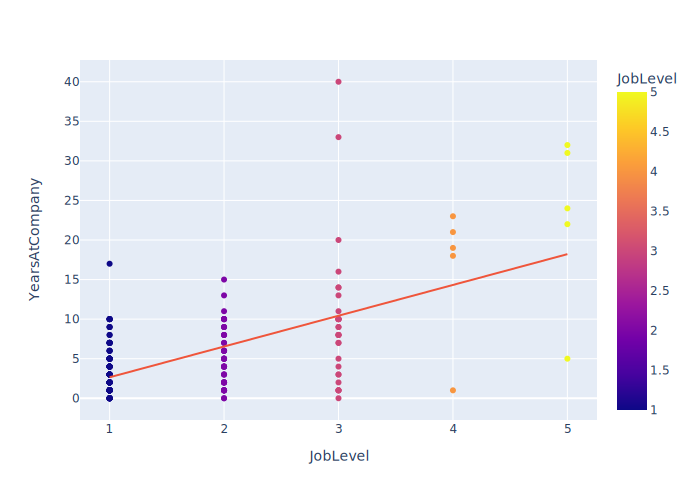

In [106]:
fig = px.scatter(Attrition, x = "JobLevel", y = "YearsAtCompany", color = 'JobLevel', trendline = 'ols')
fig.show()

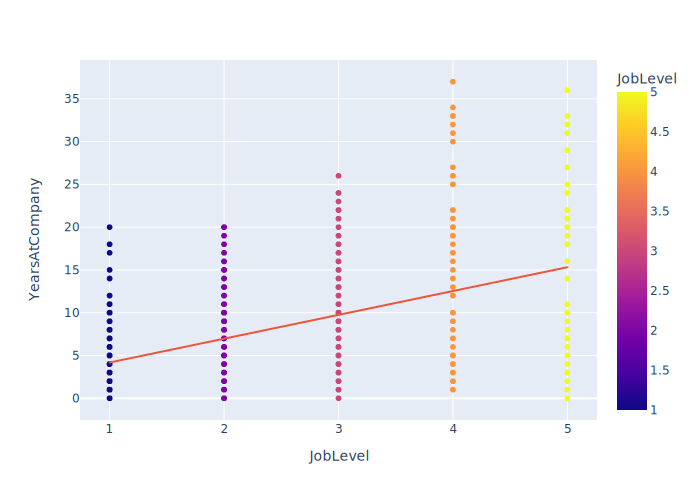

In [107]:
fig = px.scatter(Stay, x = "JobLevel", y = "YearsAtCompany", color = 'JobLevel', trendline = 'ols')
fig.show("")

From Data Above we can assume that :
1. Employee Group that decided to Attrition have more fast Career Path from Level 1 to Level 2, Compare to Employee that decided to Stay
2. But After Reaching Level 3 Job, their Career Path getting Slower. With huge difference at Level 4 and 5
3. In Contrast of That, Employee that Decided to Stay have more slower Career path, but steady with Average 3 Years for Each Level.

In Addition of That, We can assume that Level 4 and Level 5 Employee that decided to Attrition caused by slow Career Path.

But This assumption can go wrong, because our dataset is Imbalance

In [108]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Attrition.groupby("Department")[['YearsAtCompany','MonthlyIncome','JobSatisfaction','EnvironmentSatisfaction']].mean().reset_index()

Department  YearsAtCompany  MonthlyIncome  JobSatisfaction  \
0         Human Resources        4.166667    3715.750000         2.166667   
1  Research & Development        4.954887    4108.075188         2.458647   
2                   Sales        5.510870    5908.456522         2.521739   

   EnvironmentSatisfaction  
0                 2.333333  
1                 2.473684  
2                 2.467391

In [109]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Age_Income = Attrition.groupby("Age_Range")[['MonthlyIncome']].mean().reset_index()

In [110]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Stay_Age_Income = Stay.groupby("Age_Range")[['MonthlyIncome']].mean().reset_index()

In [111]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Stay_Comparison = Stay.groupby("Age_Range")[['YearsAtCompany','MonthlyIncome','JobSatisfaction','JobLevel','EnvironmentSatisfaction',]].mean().reset_index()

In [112]:
Stay_Comparison
#buat fungsi atau tabel baru berdasarkan thresold jobsatisfaction 2.5
# job level 2
# environment satisfaction 2.5

Age_Range  YearsAtCompany  MonthlyIncome  JobSatisfaction  JobLevel  \
0     18-20        1.000000    2205.250000         2.833333  1.000000   
1     21-25        3.268657    3371.223881         2.820896  1.298507   
2     26-30        5.734300    4505.019324         2.768116  1.579710   
3     31-35        6.759717    5476.851590         2.844523  1.837456   
4     36-40        7.864542    6591.653386         2.804781  2.123506   
5     41-45        8.890805    8116.770115         2.752874  2.454023   
6     46-50        9.421053   11148.263158         2.614035  3.114035   
7     51-55       10.046512   11328.406977         2.802326  3.186047   
8     56-60        7.589744    9691.717949         2.641026  2.846154   

   EnvironmentSatisfaction  
0                 2.833333  
1                 2.656716  
2                 2.835749  
3                 2.837456  
4                 2.665339  
5                 2.712644  
6                 2.842105  
7                 2.860465  
8                 2.666667

In [113]:
Stay_Mode = Stay.groupby("Age_Range")[['YearsAtCompany','MonthlyIncome','JobSatisfaction','JobLevel','EnvironmentSatisfaction',]].median().reset_index()
Stay_Mode

Age_Range  YearsAtCompany  MonthlyIncome  JobSatisfaction  JobLevel  \
0     18-20             1.0         2615.0              3.0       1.0   
1     21-25             3.0         3117.0              3.0       1.0   
2     26-30             5.0         4011.0              3.0       1.0   
3     31-35             6.0         4878.0              3.0       2.0   
4     36-40             7.0         5605.0              3.0       2.0   
5     41-45             6.0         5769.5              3.0       2.0   
6     46-50             7.0        10600.0              3.0       3.0   
7     51-55             7.0        12163.0              3.0       3.0   
8     56-60             5.0         9439.0              3.0       3.0   

   EnvironmentSatisfaction  
0                      3.0  
1                      3.0  
2                      3.0  
3                      3.0  
4                      3.0  
5                      3.0  
6                      3.0  
7                      3.0  
8                      3.0

## Average Income by Age Range for the Employee that Decided to do Attrition

Text(0.5, 1.0, 'Average Income by Age Range of Attrition Employee')

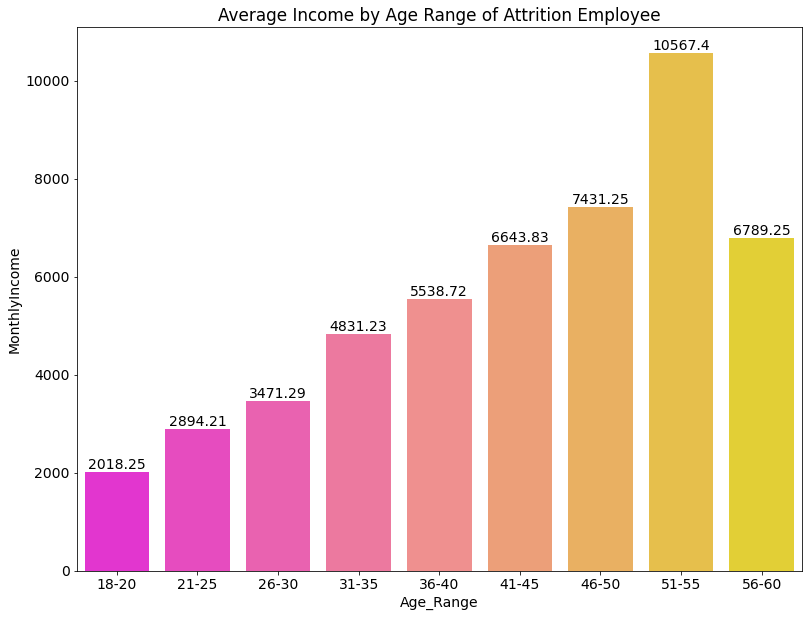

In [114]:
f, ax = plt.subplots(1, figsize = (13,10))
sns.barplot(x = 'Age_Range', y = 'MonthlyIncome', data = Age_Income, palette = 'spring')
ax.bar_label(ax.containers[0])
plt.title("Average Income by Age Range of Attrition Employee")

**Average Income Outlook for Employee that decides to do Attrition**
- Income always increases with increasing age (related to the longer working time at the company)
- There is a drastic increase in Income of 3000 from the Age group 46-50 to 51-55
- After a drastic increase There is a drastic decrease in Income from 51-55 to Age 56-60

## Average Income by Age Range for the Employee that Decided to Stay

Text(0.5, 1.0, 'Average Income by Age Range of Employee that Stay')

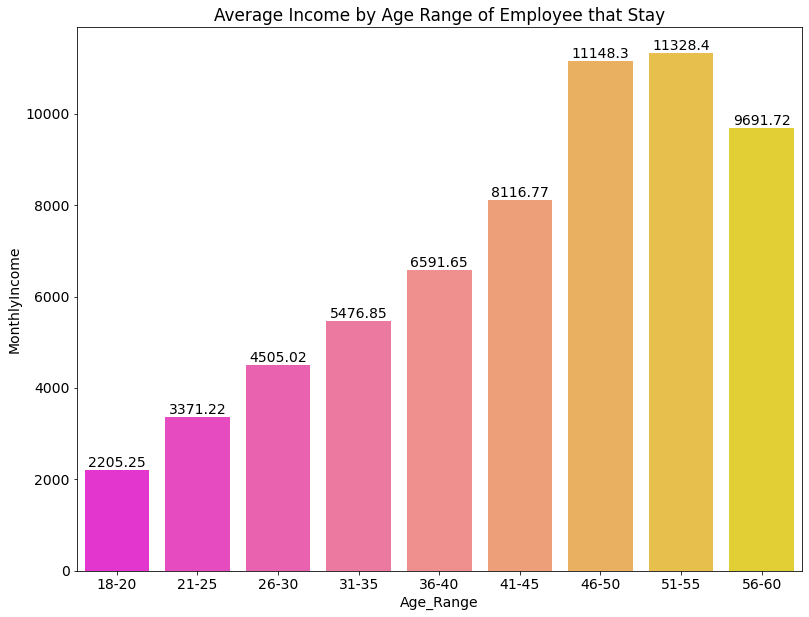

In [115]:
f, ax = plt.subplots(1, figsize = (13,10))
sns.barplot(x = 'Age_Range', y = 'MonthlyIncome', data = Stay_Age_Income, palette = 'spring')
ax.bar_label(ax.containers[0])
plt.title("Average Income by Age Range of Employee that Stay")

**Average Income Outlook for Employee that Decided to Stay**
- There is a difference in Income from the start in the `18-20` age group (Between Stay and Attrition), although the difference is not that big
- This difference in average income continues to increase and the most significant are in the `46-50` and `56-60` groups
- Employees who stay and are in the `46-50` age group have an average income difference of `4000` compared to those who decide on Attrition
- From the `51-55` to the `56-60` age group there is only a slight decrease in income, for employees who decide to stay, in contrast to employees who end at Attriton, there is a drastic decrease in income in this group (this difference can be seen in the graph below this)

In [116]:
# Compare 2 column
deef = pd.concat([Stay_Age_Income, Age_Income], axis = 1, keys = ['Stay_Age_Income', 'Age_Income'])
deef

Stay_Age_Income               Age_Income              
        Age_Range MonthlyIncome  Age_Range MonthlyIncome
0           18-20   2205.250000      18-20   2018.250000
1           21-25   3371.223881      21-25   2894.214286
2           26-30   4505.019324      26-30   3471.285714
3           31-35   5476.851590      31-35   4831.233333
4           36-40   6591.653386      36-40   5538.720000
5           41-45   8116.770115      41-45   6643.833333
6           46-50  11148.263158      46-50   7431.250000
7           51-55  11328.406977      51-55  10567.400000
8           56-60   9691.717949      56-60   6789.250000

In [117]:
deef['Income_Diff'] = np.where(deef['Stay_Age_Income']['Age_Range']==deef['Age_Income']['Age_Range'],
                              (deef['Stay_Age_Income']['MonthlyIncome']-deef['Age_Income']['MonthlyIncome']), 0)

In [118]:
yuhu = pd.merge(Stay_Age_Income, Age_Income, on='Age_Range', how='outer')

In [119]:
yuhu2 = yuhu.assign(Income_Diff=[187.00,477.00,1033.73,645.61,1052.93,1472.93,3717.01,761.00,2902.46])
yuhu2

Age_Range  MonthlyIncome_x  MonthlyIncome_y  Income_Diff
0     18-20      2205.250000      2018.250000       187.00
1     21-25      3371.223881      2894.214286       477.00
2     26-30      4505.019324      3471.285714      1033.73
3     31-35      5476.851590      4831.233333       645.61
4     36-40      6591.653386      5538.720000      1052.93
5     41-45      8116.770115      6643.833333      1472.93
6     46-50     11148.263158      7431.250000      3717.01
7     51-55     11328.406977     10567.400000       761.00
8     56-60      9691.717949      6789.250000      2902.46

## Difference Income between Employee that Stay and Atrrition

[Text(0, 0, '187'),
 Text(0, 0, '477'),
 Text(0, 0, '1033.73'),
 Text(0, 0, '645.61'),
 Text(0, 0, '1052.93'),
 Text(0, 0, '1472.93'),
 Text(0, 0, '3717.01'),
 Text(0, 0, '761'),
 Text(0, 0, '2902.46')]

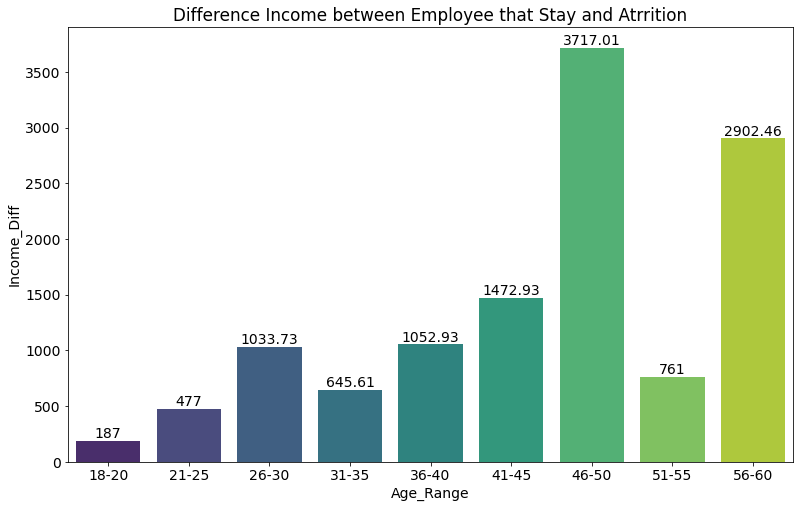

In [120]:
f, ax = plt.subplots(1, figsize = (13,8))
sns.barplot(x = 'Age_Range', y = 'Income_Diff', data = yuhu2, palette = 'viridis')
plt.title("Difference Income between Employee that Stay and Atrrition")
ax.bar_label(ax.containers[0])

- The most group ages who decided to Attrition were `26-30` (23.63%) and `31-35` (25.32%)

**However**, it can be seen here that the difference in income between employees who stay and decide to quit is not too significant.
The biggest difference is even in the Group Age `46-50` and `56-60` which do not provide a significant Attrition rate
only 6.75% for Group Age `46-50`, and 3.38% for Group Age `56-60.`

**In conclusion**, Income **is not the main determinant** of someone deciding Attrition or not.

[Text(0.5, 1.0, 'Difference Income between Employee that Stay and Atrrition')]

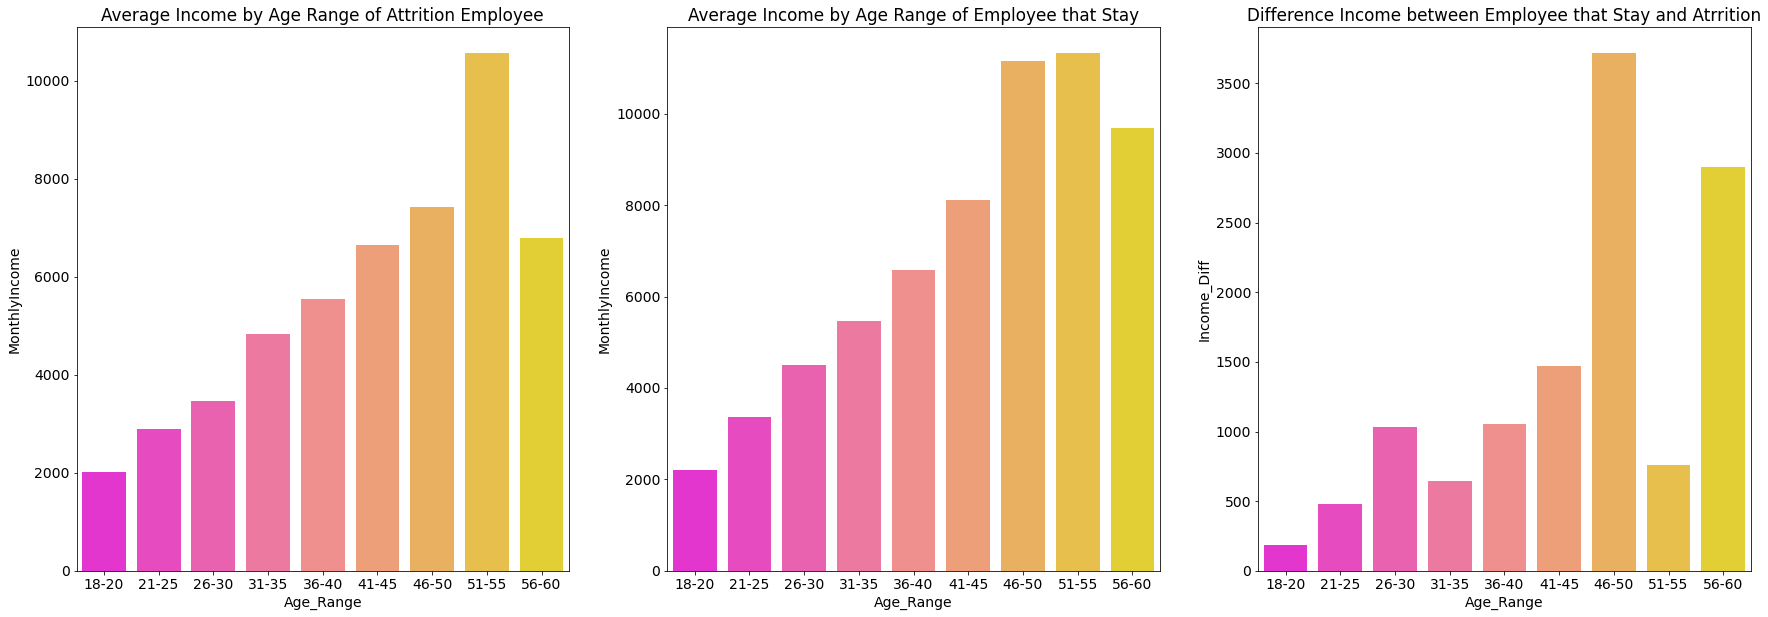

In [121]:
f, ax = plt.subplots(1,3, figsize = (30,10))
sns.barplot(x = 'Age_Range', y = 'MonthlyIncome', data = Age_Income, palette = 'spring',ax=ax[0]).set(title="Average Income by Age Range of Attrition Employee")
sns.barplot(x = 'Age_Range', y = 'MonthlyIncome', data = Stay_Age_Income, palette = 'spring', ax=ax[1]).set(title="Average Income by Age Range of Employee that Stay")
sns.barplot(x = 'Age_Range', y = 'Income_Diff', data = yuhu2, palette = 'spring', ax=ax[2]).set(title="Difference Income between Employee that Stay and Atrrition")

## Average Working Years at Company for Client that Stay, Groupping by Age Range

In [122]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Attrition_Compare = Attrition.groupby("Age_Range")[['YearsAtCompany','JobSatisfaction','EnvironmentSatisfaction','JobLevel','MonthlyIncome']].mean().reset_index()

In [123]:
Attrition_Compare

Age_Range  YearsAtCompany  JobSatisfaction  EnvironmentSatisfaction  \
0     18-20        0.750000         2.750000                 2.812500   
1     21-25        2.214286         2.464286                 2.607143   
2     26-30        3.910714         2.410714                 2.392857   
3     31-35        5.150000         2.450000                 2.416667   
4     36-40        5.040000         2.080000                 2.640000   
5     41-45        8.111111         2.388889                 2.000000   
6     46-50        6.875000         2.750000                 2.437500   
7     51-55       13.000000         2.800000                 2.000000   
8     56-60       12.750000         2.875000                 3.250000   

   JobLevel  MonthlyIncome  
0  1.000000    2018.250000  
1  1.107143    2894.214286  
2  1.267857    3471.285714  
3  1.650000    4831.233333  
4  1.920000    5538.720000  
5  2.055556    6643.833333  
6  2.437500    7431.250000  
7  3.100000   10567.400000  
8  2.000000    6789.250000

In [124]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Attrition_Compare = Attrition.groupby("Age_Range")[['YearsAtCompany','JobSatisfaction','EnvironmentSatisfaction','JobLevel']].mean().reset_index()

In [125]:
Attrition_Compare

Age_Range  YearsAtCompany  JobSatisfaction  EnvironmentSatisfaction  \
0     18-20        0.750000         2.750000                 2.812500   
1     21-25        2.214286         2.464286                 2.607143   
2     26-30        3.910714         2.410714                 2.392857   
3     31-35        5.150000         2.450000                 2.416667   
4     36-40        5.040000         2.080000                 2.640000   
5     41-45        8.111111         2.388889                 2.000000   
6     46-50        6.875000         2.750000                 2.437500   
7     51-55       13.000000         2.800000                 2.000000   
8     56-60       12.750000         2.875000                 3.250000   

   JobLevel  
0  1.000000  
1  1.107143  
2  1.267857  
3  1.650000  
4  1.920000  
5  2.055556  
6  2.437500  
7  3.100000  
8  2.000000

In [126]:
Attrition_Mode = Attrition.groupby("Age_Range")[['YearsAtCompany','MonthlyIncome','JobSatisfaction','JobLevel','EnvironmentSatisfaction',]].median().reset_index()
Attrition_Mode

Age_Range  YearsAtCompany  MonthlyIncome  JobSatisfaction  JobLevel  \
0     18-20             1.0         1974.0              3.0       1.0   
1     21-25             1.5         2686.0              2.5       1.0   
2     26-30             3.0         2530.5              2.5       1.0   
3     31-35             4.0         4216.5              3.0       1.5   
4     36-40             3.0         4777.0              2.0       2.0   
5     41-45             5.5         3723.5              2.5       1.5   
6     46-50             6.5         7055.0              3.0       2.5   
7     51-55             8.5        10308.5              3.0       3.0   
8     56-60             7.5         3775.0              3.0       1.0   

   EnvironmentSatisfaction  
0                      3.0  
1                      3.0  
2                      2.5  
3                      2.0  
4                      3.0  
5                      2.0  
6                      2.5  
7                      1.5  
8                      4.0

[Text(0, 0, '1'),
 Text(0, 0, '3.26866'),
 Text(0, 0, '5.7343'),
 Text(0, 0, '6.75972'),
 Text(0, 0, '7.86454'),
 Text(0, 0, '8.8908'),
 Text(0, 0, '9.42105'),
 Text(0, 0, '10.0465'),
 Text(0, 0, '7.58974')]

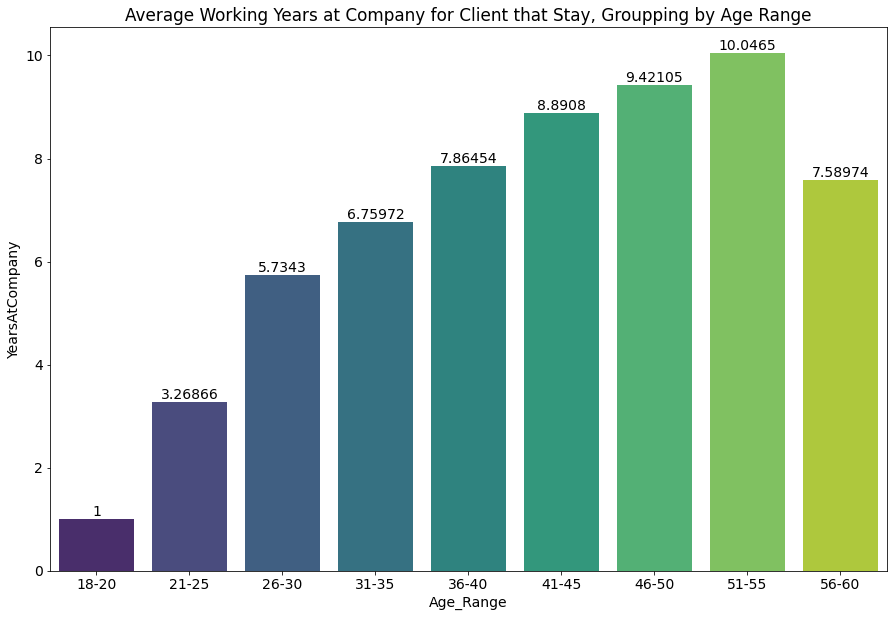

In [127]:
f, ax = plt.subplots(1, figsize = (15,10))
sns.barplot(x = 'Age_Range', y = 'YearsAtCompany', data = Stay_Comparison, palette = 'viridis')
plt.title("Average Working Years at Company for Client that Stay, Groupping by Age Range")
plt.rc('font', size=MEDIUM_SIZE)
ax.bar_label(ax.containers[0])

## Average Working Years at Company for Client that Stay, Groupping by Age Range

[Text(0, 0, '0.75'),
 Text(0, 0, '2.21429'),
 Text(0, 0, '3.91071'),
 Text(0, 0, '5.15'),
 Text(0, 0, '5.04'),
 Text(0, 0, '8.11111'),
 Text(0, 0, '6.875'),
 Text(0, 0, '13'),
 Text(0, 0, '12.75')]

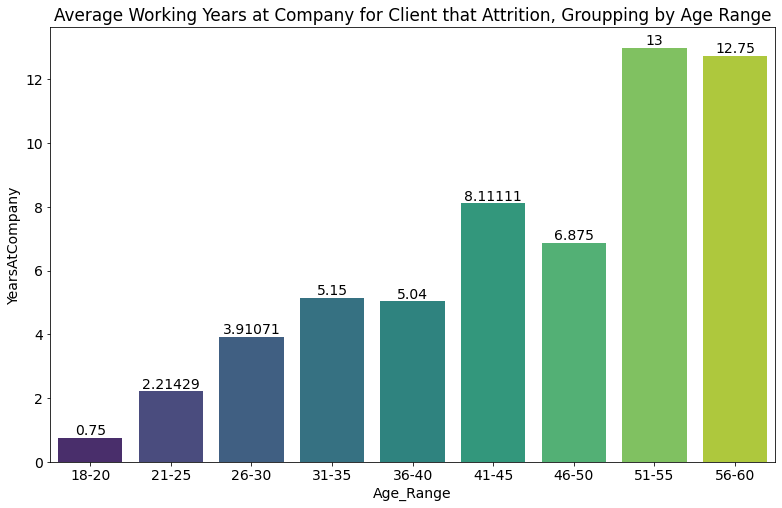

In [128]:
f, ax = plt.subplots(1, figsize = (13,8))
sns.barplot(x = 'Age_Range', y = 'YearsAtCompany', data = Attrition_Compare, palette = 'viridis')
plt.title("Average Working Years at Company for Client that Attrition, Groupping by Age Range")
plt.rc('font', size=MEDIUM_SIZE)
ax.bar_label(ax.containers[0])

In [129]:
import plotly.express as px
import plotly.graph_objects as go

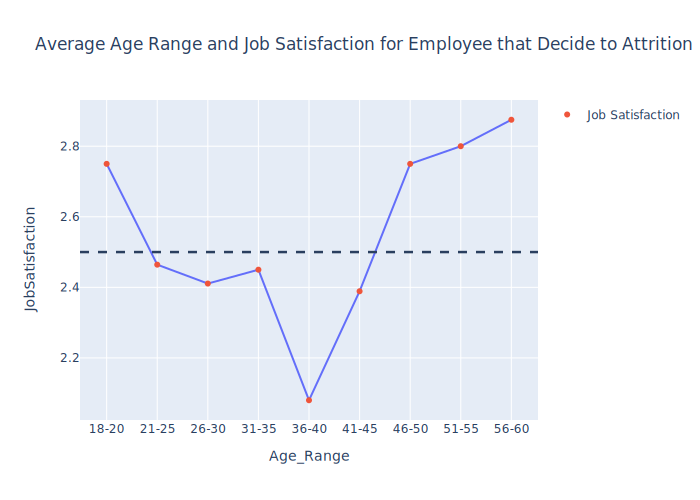

In [130]:
fig = px.line(Attrition_Compare, x = "Age_Range", y = "JobSatisfaction", 
              title = "Average Age Range and Job Satisfaction for Employee that Decide to Attrition")
fig.add_scatter(x = Attrition_Compare['Age_Range'], y = Attrition_Compare['JobSatisfaction'], mode = 'markers', name = "Job Satisfaction")
fig.add_hline(y=2.5, line_width = 2.5, line_dash = "dash", name = "Thresold")
fig.show()

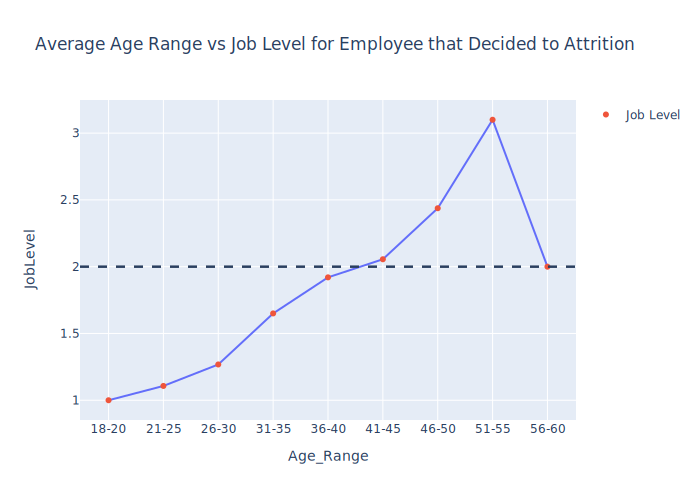

In [131]:
import plotly.express as px

fig = px.line(Attrition_Compare, x = "Age_Range", y = "JobLevel", 
              title = "Average Age Range vs Job Level for Employee that Decided to Attrition")
fig.add_scatter(x = Attrition_Compare["Age_Range"], y = Attrition_Compare["JobLevel"], mode = "markers", name = "Job Level")
fig.add_hline(y=2, line_width = 2.5, line_dash ="dash", name = "Threshold")
fig.show()

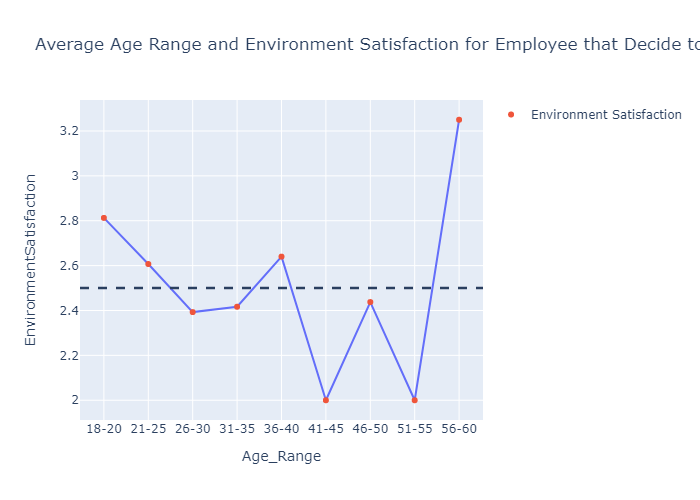

In [133]:
import plotly.express as px

fig = px.line(Attrition_Compare, x = "Age_Range", y = "EnvironmentSatisfaction", 
              title = "Average Age Range and Environment Satisfaction for Employee that Decide to Attrition")
fig.add_scatter(x = Attrition_Compare["Age_Range"], y = Attrition_Compare["EnvironmentSatisfaction"], mode = "markers", name = "Environment Satisfaction")
fig.add_hline(y=2.5, line_width = 2.5, line_dash ="dash", name = "Threshold")
fig.show(renderer = "png")

In [134]:
# Average Monthly Income and Jobsatisfaction by Deparment for People who Attrition from Job
Stay_Comparison = Stay.groupby("Age_Range")[['YearsAtCompany','MonthlyIncome','JobSatisfaction','JobLevel','EnvironmentSatisfaction',]].mean().reset_index()

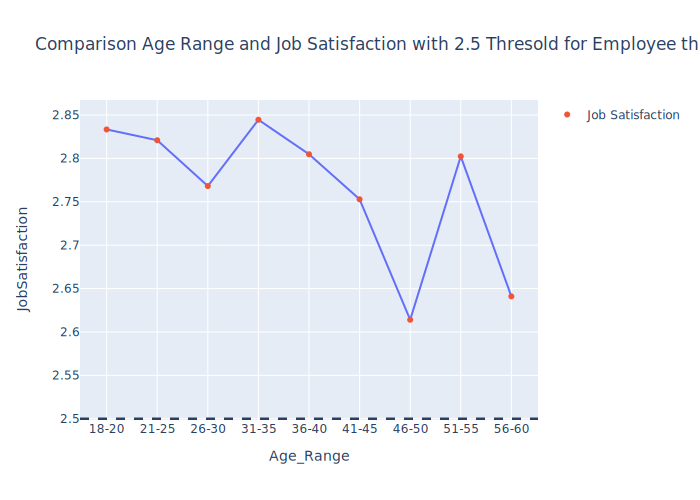

In [135]:
fig = px.line(Stay_Comparison, x = "Age_Range", y = "JobSatisfaction", title = "Comparison Age Range and Job Satisfaction with 2.5 Thresold for Employee that Stay")
fig.add_scatter(x = Stay_Comparison['Age_Range'], y = Stay_Comparison['JobSatisfaction'], mode = 'markers', name = "Job Satisfaction")
fig.add_hline(y=2.5, line_width = 2.5, line_dash = "dash", name = "Thresold")
fig.show()

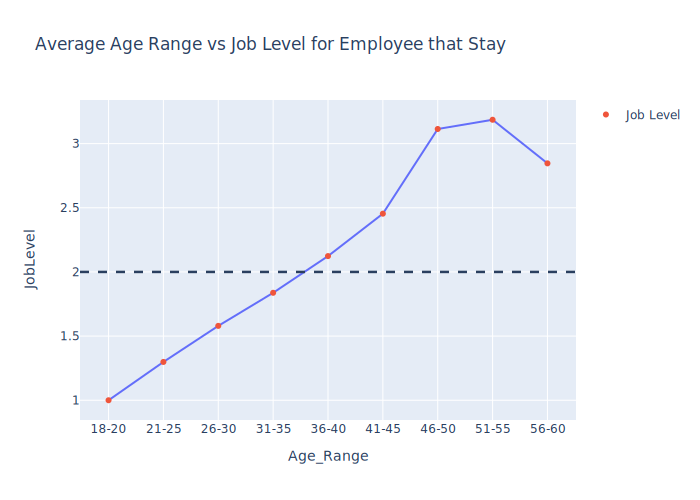

In [136]:
import plotly.express as px

fig = px.line(Stay_Comparison, x = "Age_Range", y = "JobLevel", 
              title = "Average Age Range vs Job Level for Employee that Stay")
fig.add_scatter(x = Stay_Comparison["Age_Range"], y = Stay_Comparison["JobLevel"], mode = "markers", name = "Job Level")
fig.add_hline(y=2, line_width = 2.5, line_dash ="dash", name = "Threshold")
fig.show()

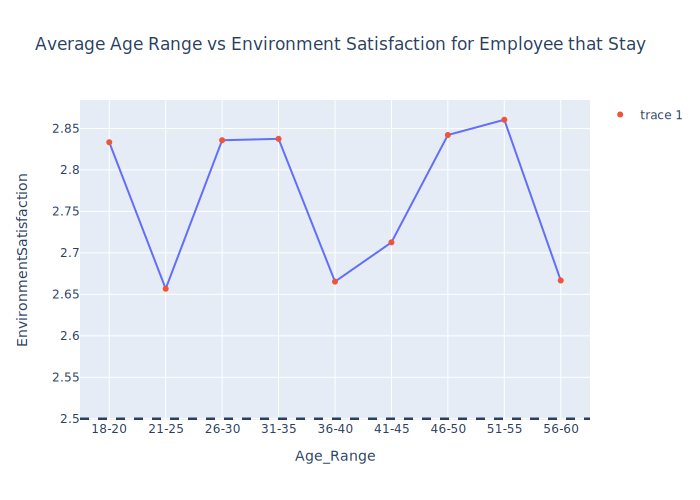

In [137]:
import plotly.express as px

fig = px.line(Stay_Comparison, x = "Age_Range", y = "EnvironmentSatisfaction", title = "Average Age Range vs Environment Satisfaction for Employee that Stay")
fig.add_scatter(x = Stay_Comparison["Age_Range"], y = Stay_Comparison["EnvironmentSatisfaction"], mode = "markers")
fig.add_hline(y=2.5, line_width = 2.5, line_dash ="dash", name = "Threshold")
fig.show()

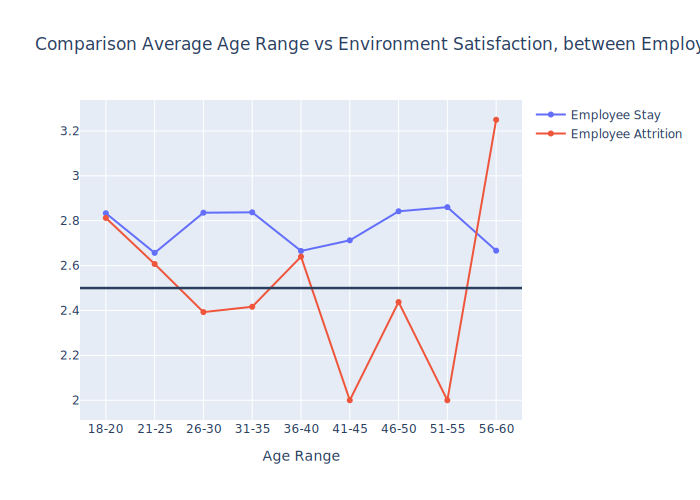

In [138]:
import plotly.graph_objs as go

# Create traces for each dataset
trace1 = go.Scatter(x=Stay_Comparison["Age_Range"], y=Stay_Comparison["EnvironmentSatisfaction"], mode="lines+markers", name="Employee Stay")
trace2 = go.Scatter(x=Attrition_Compare["Age_Range"], y=Attrition_Compare["EnvironmentSatisfaction"], mode="lines+markers", name="Employee Attrition")

# Create layout for the combined plot
layout = go.Layout(title="Comparison Average Age Range vs Environment Satisfaction, between Employee Stay and Attrition", xaxis=dict(title="Age Range"))

# Create a new figure and add the traces and layout to it
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Add the threshold line
fig.add_hline(y=2.5, line_width=2.5, line_dash="solid", name="Threshold")

# Show the figure
fig.show()

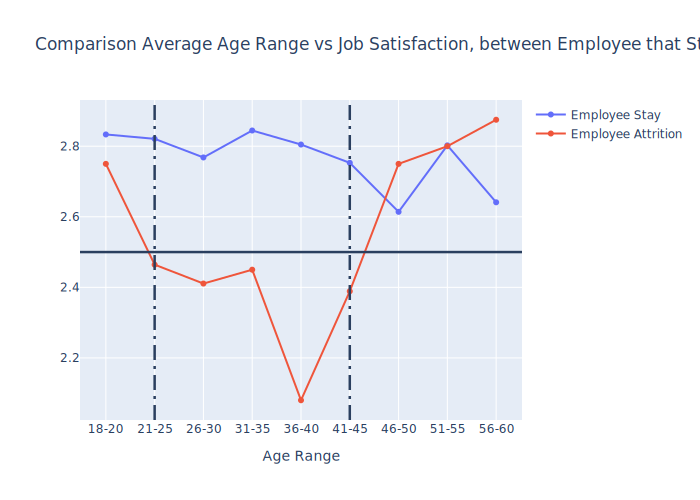

In [139]:
import plotly.graph_objs as go

# Create traces for each dataset
trace1 = go.Scatter(x=Stay_Comparison["Age_Range"], y=Stay_Comparison["JobSatisfaction"], mode="lines+markers", name="Employee Stay")
trace2 = go.Scatter(x=Attrition_Compare["Age_Range"], y=Attrition_Compare["JobSatisfaction"], mode="lines+markers", name="Employee Attrition")

# Create layout for the combined plot
layout = go.Layout(title="Comparison Average Age Range vs Job Satisfaction, between Employee that Stay vs Attrition", xaxis=dict(title="Age Range"))

# Create a new figure and add the traces and layout to it
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Add the threshold line
fig.add_hline(y=2.5, line_width=2.5, line_dash="solid", name="Threshold")
fig.add_vline(x='21-25', line_width = 2.5, line_dash="longdashdot")
fig.add_vline(x='41-45', line_width = 2.5, line_dash="longdashdot")

# Show the figure
fig.show()

I set 2.5 As a Average Thresold because maximum Job Satisfaction Range is 5

Group that have Average Job Satisfaction below 2.5 have high Tendency to do Attrition, 

this statement supported with this Distribution Data :
Comparison Group Age Distribution (%) vs All Employee that Decided to Attrition:
- Group Age 21-25, 11% Employee
- Group Age 26-30, 23.63% Employee
- Group Age 31-35, 25.32% Employee
- Group Age 36-40, 10.55% Employee

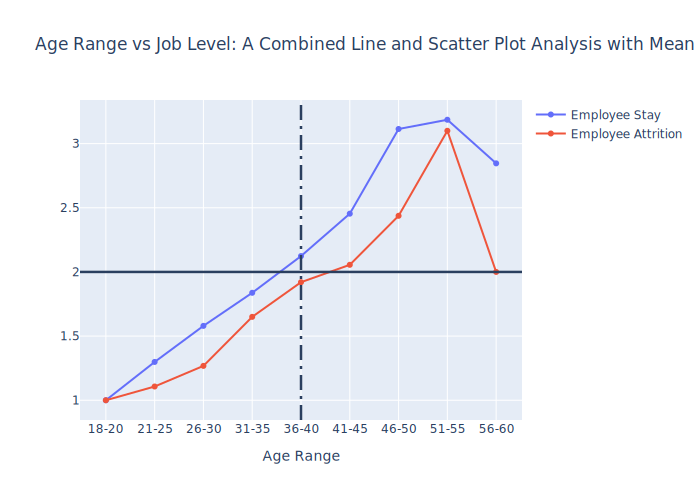

In [140]:
import plotly.graph_objs as go

# mean 

# Create traces for each dataset
trace1 = go.Scatter(x=Stay_Comparison["Age_Range"], y=Stay_Comparison["JobLevel"], mode="lines+markers", name="Employee Stay")
trace2 = go.Scatter(x=Attrition_Compare["Age_Range"], y=Attrition_Compare["JobLevel"], mode="lines+markers", name="Employee Attrition")

# Create layout for the combined plot
layout = go.Layout(title="Age Range vs Job Level: A Combined Line and Scatter Plot Analysis with Mean Data", xaxis=dict(title="Age Range"))

# Create a new figure and add the traces and layout to it
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Add the threshold line
fig.add_hline(y=2, line_width=2.5, line_dash="solid", name="Threshold")
fig.add_vline(x='36-40', line_width = 2.5, line_dash="longdashdot")
# Show the figure
fig.show()

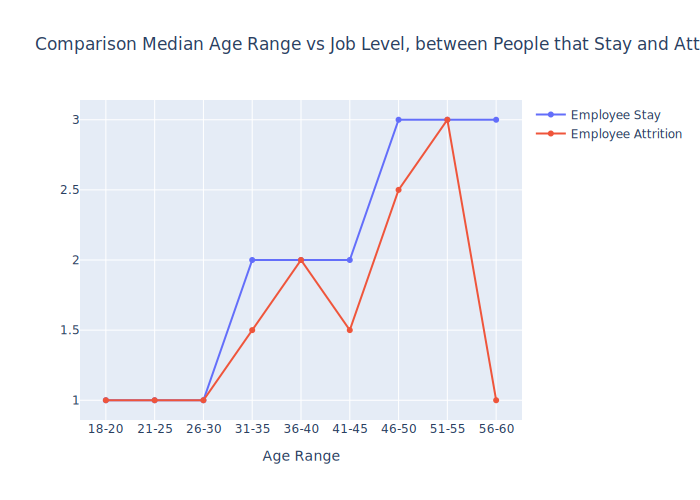

In [141]:
import plotly.graph_objs as go

# Create traces for each dataset
trace1 = go.Scatter(x=Stay_Mode["Age_Range"], y=Stay_Mode["JobLevel"], mode="lines+markers", name="Employee Stay")
trace2 = go.Scatter(x=Attrition_Mode["Age_Range"], y=Attrition_Mode["JobLevel"], mode="lines+markers", name="Employee Attrition")

# Create layout for the combined plot
layout = go.Layout(title="Comparison Median Age Range vs Job Level, between People that Stay and Attrition", xaxis=dict(title="Age Range"))

# Create a new figure and add the traces and layout to it
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Add the threshold line

# Show the figure
fig.show()

In [142]:
## Comparison between Job Level and YearsAtCompany

In [143]:
Attrition = new_df[new_df['Attrition'] == 1]

In [144]:
Stay = new_df[new_df['Attrition'] == 0]

In [145]:
import plotly.express as px
import plotly.graph_objects as go

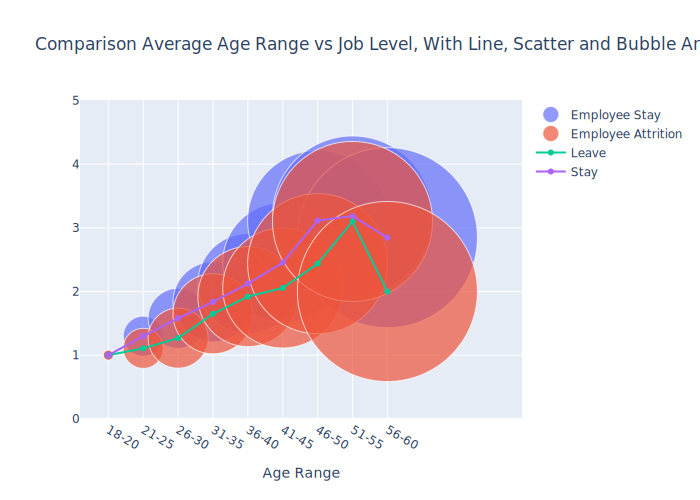

In [146]:
import plotly.graph_objs as go

# Create traces for each dataset
trace1 = go.Scatter(x=Stay_Comparison["Age_Range"], y=Stay_Comparison["JobLevel"], mode="markers", marker_size=[10,40,60,80,100,120,140,160,180,200],
                    name="Employee Stay")
trace2 = go.Scatter(x=Attrition_Compare["Age_Range"], y=Attrition_Compare["JobLevel"], mode="markers", marker_size=[10,40,60,80,100,120,140,160,180,200],
            name="Employee Attrition")

# Create layout for the combined plot
layout = go.Layout(title="Comparison Average Age Range vs Job Level, With Line, Scatter and Bubble Analysis", xaxis=dict(title="Age Range"))

# Create a new figure and add the traces and layout to it
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.add_scatter(x = Attrition_Compare['Age_Range'], y = Attrition_Compare['JobLevel'], mode = 'lines+markers', name = 'Leave')
fig.add_scatter(x = Stay_Comparison['Age_Range'], y = Stay_Comparison['JobLevel'], mode = 'lines+markers', name = 'Stay')

# Show the figure
fig.show()

In [147]:
Gender_Stay = Stay.groupby("Gender")[['YearsAtCompany','MonthlyIncome','JobSatisfaction']].mean().reset_index()
Gender_Stay

Gender  YearsAtCompany  MonthlyIncome  JobSatisfaction
0  Female        7.459082    7019.429142         2.728543
1    Male        7.307377    6704.964481         2.812842

[Text(0, 0, '7.45908'), Text(0, 0, '7.30738')]

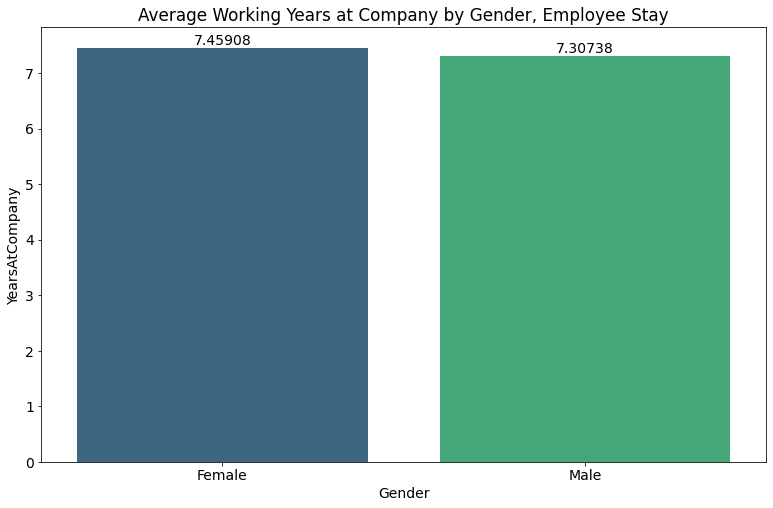

In [148]:
f, ax = plt.subplots(1, figsize = (13,8))
sns.barplot(x = 'Gender', y = 'YearsAtCompany', data = Gender_Stay, palette = 'viridis')
plt.title("Average Working Years at Company by Gender, Employee Stay")
ax.bar_label(ax.containers[0])

In [149]:
Gender_Att = Attrition.groupby("Gender")[['YearsAtCompany','MonthlyIncome','JobSatisfaction']].mean().reset_index()
Gender_Att

Gender  YearsAtCompany  MonthlyIncome  JobSatisfaction
0  Female        5.919540    4769.735632         2.425287
1    Male        4.673333    4797.160000         2.493333

[Text(0, 0, '5.91954'), Text(0, 0, '4.67333')]

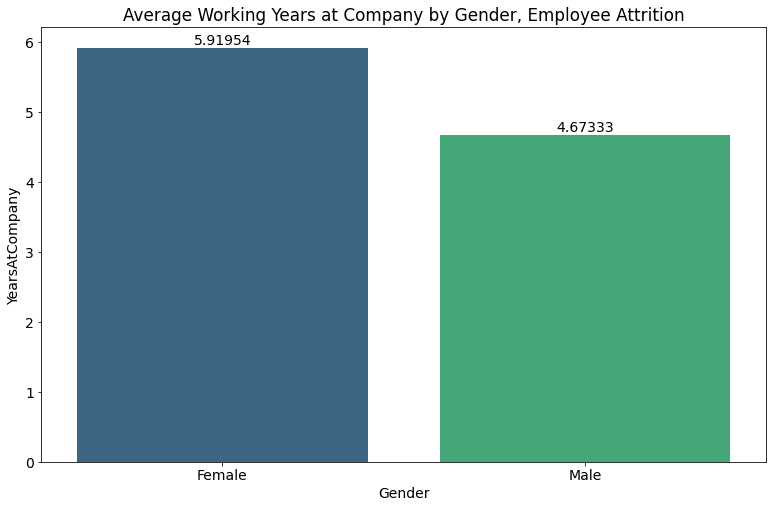

In [150]:
f, ax = plt.subplots(1, figsize = (13,8))
sns.barplot(x = 'Gender', y = 'YearsAtCompany', data = Gender_Att, palette = 'viridis')
plt.title("Average Working Years at Company by Gender, Employee Attrition")
ax.bar_label(ax.containers[0])

In [151]:
def compare(df1, df2, index, column, values):
    dfp_leave = Attrition.pivot_table(index=index,
                                     columns=column,
                                     values=values, aggfunc=np.mean)
    dfp_stay = Stay.pivot_table(index=index,
                               columns=column,
                               values=values, aggfunc=np.mean)
    dfp = dfp_leave/dfp_stay
    return dfp

In [152]:
def set2():
    sns.set_theme(font_scale=1.5,
                  rc={
        'figure.figsize': (20, 8),
        'axes.facecolor': '#FBFBFB',
        'axes.edgecolor': '#AFAFAF',
        'axes.grid': True,
        'grid.color': '#E9E9E9',
        'legend.fontsize': 12,
        'legend.title_fontsize': 15
                   })

In [153]:
Lebih_10 = Attrition[Attrition['YearsAtCompany'] >= 10]

In [154]:
Kurang_10 = Stay[Stay['YearsAtCompany'] >= 10]

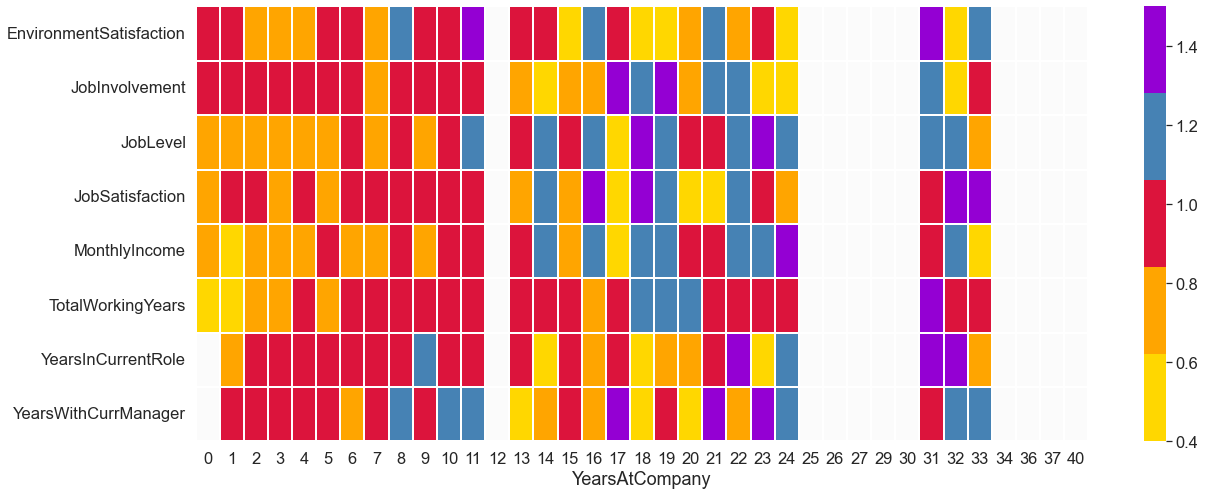

In [155]:
values = ['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','TotalWorkingYears',
          'YearsInCurrentRole','YearsWithCurrManager']
column = ['YearsAtCompany']

dfp2 = compare(Attrition, Stay, index = [], column = column, values = values)

set2()
cmap_list = [colores[11], colores[0], colores[3], colores[7], colores[12], colores[1]]
ax = sns.heatmap(dfp2, vmin=0.4, vmax=1.5, cmap=cmap_list[:5], linewidths=0.1, linecolor = 'white')
ax.tick_params(axis='x', rotation=0)

**Notice something that is not red, that's how to read this** :
- Job Level have high Impact, the first 5 years determine whether someone leave or Attrition in the Company
- Monthly Income also have significant impact, the first 4 years will determine whether Employee choose to leave or stay in the Company
- Environment Satisfaction, even Employee already satisfied after work around 2-4 years, Employee still have a possibility to choose Attrition in the next year, because the office atmosphere will always change with changing employees.
- Total Working Years, Employee that already work more than 3 years in Any Company, most likely have lower chance for Attrition
- Years in Current Role, If Employee feel that he doesn't fit with the role that he currently working, most likely they will Attrition

In [156]:
def compara(df1, df2, index, column, values):
    dfp_leave = Lebih_10.pivot_table(index=index,
                                     columns=column,
                                     values=values, aggfunc=np.mean)
    dfp_stay = Kurang_10.pivot_table(index=index,
                               columns=column,
                               values=values, aggfunc=np.mean)
    dfp = dfp_leave/dfp_stay
    return dfp

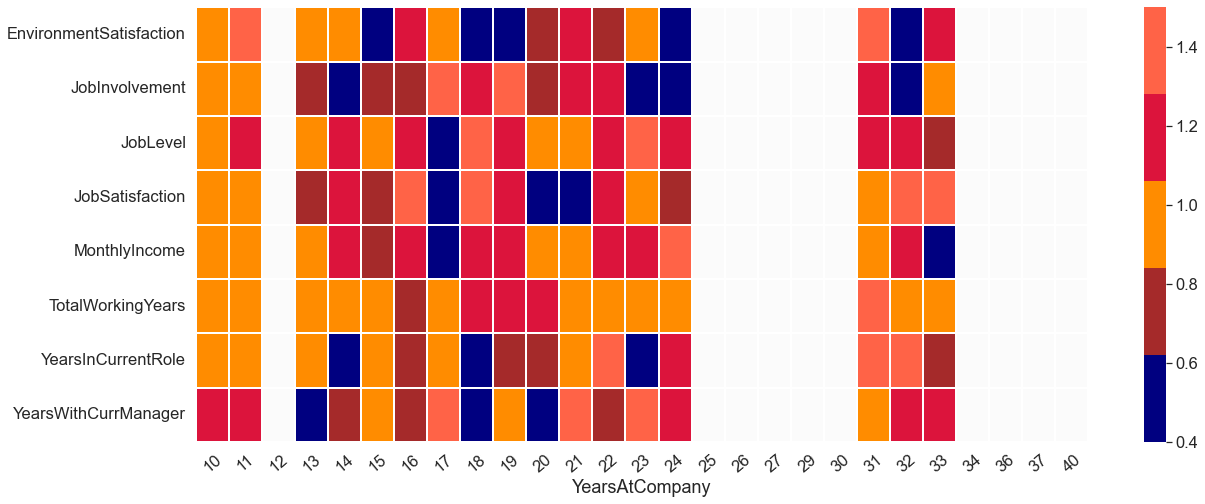

In [157]:
# More Than Ten Years
values = ['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','TotalWorkingYears',
          'YearsInCurrentRole','YearsWithCurrManager']
column = ['YearsAtCompany']

dfp2 = compara(Lebih_10, Kurang_10, index = [], column = column, values = values)

set2()
cmap_list = [colores[1], colores[5], colores[9], colores[3], colores[2], colores[4]]
ax = sns.heatmap(dfp2, vmin=0.4, vmax=1.5, cmap=cmap_list[:5], linewidths=0.1, linecolor = 'white')
ax.tick_params(axis='x', rotation=40)

1. `After 10 Years` of Work in this Company, Employee that don't change Manager, most likely have higher chance for Attrition
2. Total Working Years and Years in Current Role `After 17 Years` most likely employee will be Attrition
3. If Employee Job Level doesn't Increase `After 15 years` working in this company, they most likely will Attrition
4. Employee that doesn't satisfied with the Monthly Income `After 13 Years` Work in This Company, they most likely will Attrition
5. Employee that doesn't have high Job Involvement after `12 years of Work` most likely will Attrition
6. Employee that doesn't Satisfied enough after `12 years of work` most likely will Attrition
7. Environment Satisfaction is the most random variable, because its depend on Employee change overtime, so the Work Atmosphere will change overtime too

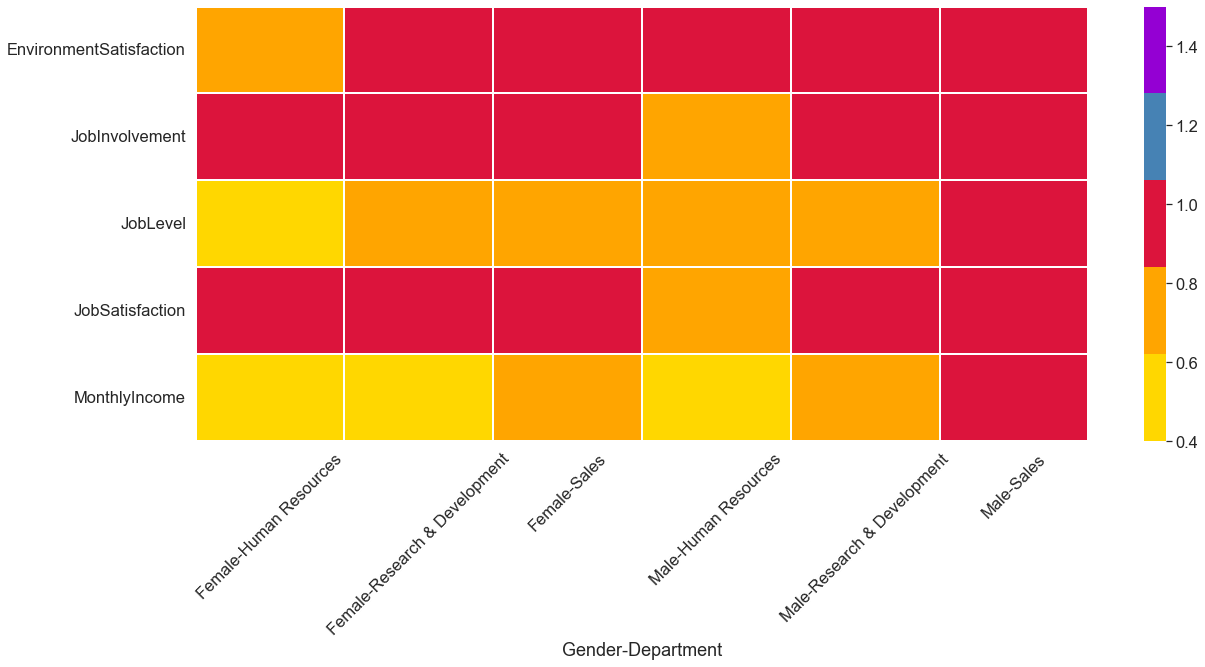

In [158]:
values = ['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome']
column = ['Gender', 'Department']

dfp2 = compare(Attrition, Stay, index = [], column = column, values = values)

set2()
cmap_list = [colores[11], colores[0], colores[3], colores[7], colores[12], colores[1]]
ax = sns.heatmap(dfp2, vmin=0.4, vmax=1.5, cmap=cmap_list[:5], linewidths=0.1, linecolor = 'white')
ax.tick_params(axis='x', rotation=45)

1. For `Female Sales and Male Research Development`, Monthly Income have Important Role for making Decision about Attrition / Stay.
2. For `Male HR`, Job Satisfaction have Important Role for making Decision about Attrition / Stay.
3. For `Female R&D, Female Sales, Male HR and Male R&D`, Job Level have Important Role for making Decision about Attrition / Stay.
4. For `Male HR` Job Involvement have Important Role for making Decision about Attrition / Stay.
5. For `Female HR`, Environment Satisfaction have Important Role for making Decision about Attrition / Stay.

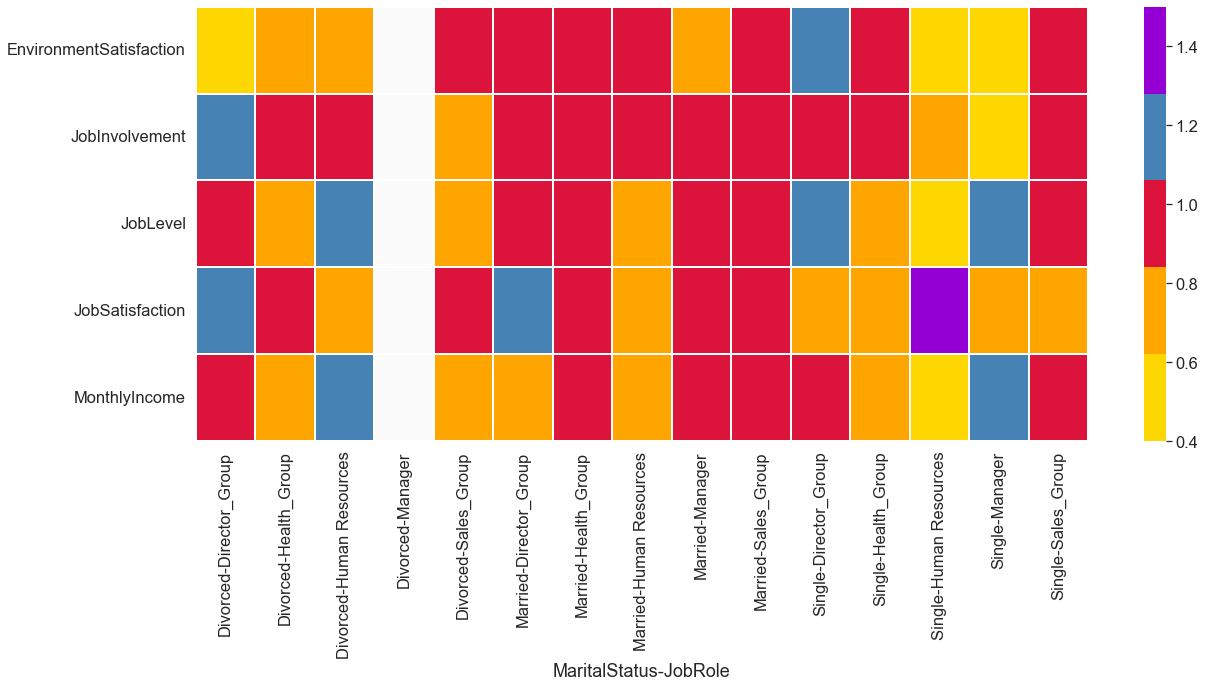

In [159]:
values = ['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome']
column = ['MaritalStatus','JobRole']

dfp2 = compare(Attrition, Stay, index = [], column = column, values = values)

set2()
cmap_list = [colores[11], colores[0], colores[3], colores[7], colores[12], colores[1]]
ax = sns.heatmap(dfp2, vmin=0.4, vmax=1.5, cmap=cmap_list[:5], linewidths=0.1, linecolor = 'white')
ax.tick_params(axis='x', rotation=90)

1. For `Divorced Group Except Sales and Manager`, Environment Satisfaction is Priority in the work. Married HR also feel the same way
Unique Fact there's no Manager that Divorced in this Company
2. For `Divorced Group (Director , Group) and Single HR`, Job Involvement is very Important to making decision about Attrition.
3. `Divorced Group (Director), Married Group (Director, Health, Manager, Sales), Single Group (Sales)` thinking that Job Level is not that Important for them to making a decision between Stay / Attrition in the Company
4. `Divorced Group (Director, HR), Married Group (Director, HR), and all Single Group` think that Job Satisfaction is very Important Part in Job.
5. `Except for Divorced Director`, Married Group (Health, Manager, Sales), Single Group (Sales and Director)
everyone think that Monthly Income is very Important Part in Job.

**Conclusion Prior to Making Decision About Leave / Stay in Company**
- For Most of Divorced Group, `Environment Satisfaction` in Work is Top Priority.
- Almost All of Divorced and Single Group think that `Job Level` and `Monthly Income` is very Important.
- All of Single Group think that `Job Satisfaction` is Very Important.
- `Almost All of Married Group` think that Environment Satisfaction, Job Involvement and Job Level is not that Important.

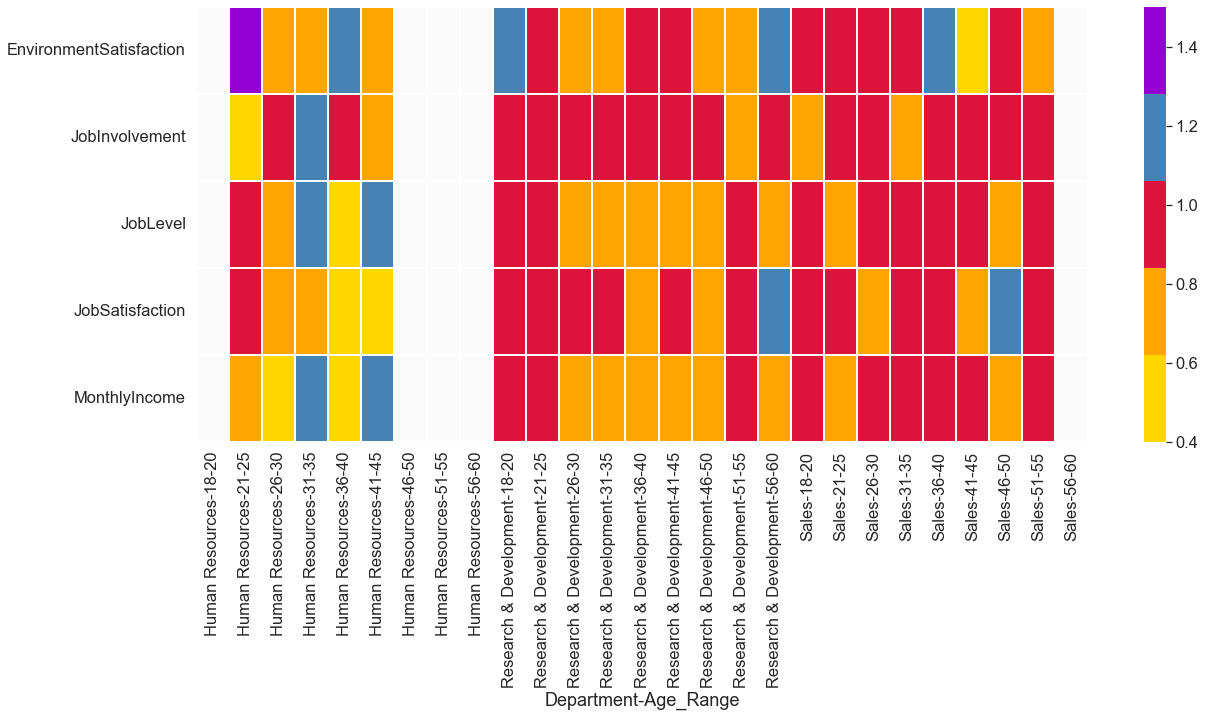

In [160]:
values = ['EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome']
column = ['Department','Age_Range']

dfp2 = compare(Attrition, Stay, index = [], column = column, values = values)

set2()
cmap_list = [colores[11], colores[0], colores[3], colores[7], colores[12], colores[1]]
ax = sns.heatmap(dfp2, vmin=0.4, vmax=1.5, cmap=cmap_list[:5], linewidths=0.1, linecolor = 'white')
ax.tick_params(axis='x', rotation=90)

1. For `R&D Department with Age between 26-50`, Job Level and Monthly Income Take Important Part.
2. For `HR Department Almost all Age`, Monthly Income, Job Level, and Environment Satisfaction is Very Important Prior to them.
3. `Job Involvement` is not that **Important** when we scale it to bigger outlook.
4. `Sales Department` doesn't have any key metrics, all seems so unimportant for them

In [161]:
# Bivariate Analysis Done

# Feature Engineering

In [162]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  StockOptionLevel         1470 non-null  

In [163]:
Cats = ['BusinessTravel','Department','EducationField','Gender','JobRole','Age_Range','OverTime','MaritalStatus']

In [164]:
new_df[Cats].describe()

BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              5      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

             JobRole Age_Range OverTime MaritalStatus  
count           1470      1470     1470          1470  
unique             5         9        2             3  
top     Health_Group     31-35       No       Married  
freq             682       343     1054           673

In [165]:
data_pre = new_df.copy()

- 2 Distinct Values convert with Label Encoding
- More than 2, One Hot encoding

In [166]:
data_pre['Gender'] = data_pre['Gender'].replace('Male', 1).replace('Female', 0)

In [167]:
data_pre['OverTime'] = data_pre['OverTime'].replace('Yes', 1).replace('No', 0)

In [168]:
data = pd.get_dummies(data = data_pre, columns = ['BusinessTravel','Department','EducationField','JobRole','Age_Range','MaritalStatus'],
                     drop_first = True)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   EnvironmentSatisfaction            1470 non-null   int64
 3   Gender                             1470 non-null   int64
 4   JobInvolvement                     1470 non-null   int64
 5   JobLevel                           1470 non-null   int64
 6   JobSatisfaction                    1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   OverTime                           1470 non-null   int64
 9   StockOptionLevel                   1470 non-null   int64
 10  TotalWorkingYears                  1470 non-null   int64
 11  YearsAtCompany                     1470 non-null   int64
 12  YearsInCurrentRole  

## Split Train Test data

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X = data.drop(['Attrition'], axis = 1)
y = data['Attrition']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1176, 35) (294, 35) (1176,) (294,)


In [173]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis = 1)

In [174]:
loan_train = pd.concat([X_train, y_train], axis=1)

<AxesSubplot:ylabel='features'>

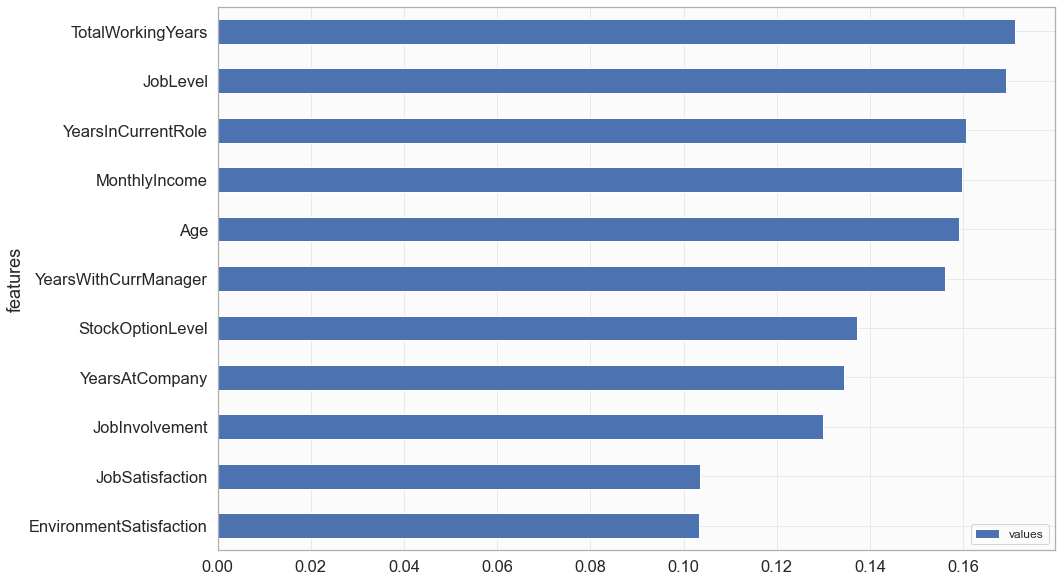

In [175]:
new_df_corr = new_df.corr()
new_df_corr.Attrition.sort_values()[:-1]
results = {}
for k, v in new_df_corr.Attrition.sort_values()[:-1].items():
    
    results[k] =abs(v)
    
# Sort the dictionary by value in descending order
sorted_d = dict(sorted(results.items(), key=lambda item: item[1], reverse=False))
results  = pd.DataFrame({'features':sorted_d.keys(), 'values':sorted_d.values()})
results

# Plot the features importance 
results.plot(x = "features", y="values", kind="barh", figsize = (15,10))

<AxesSubplot:title={'center':'Corellation between Numerical Value and Target'}>

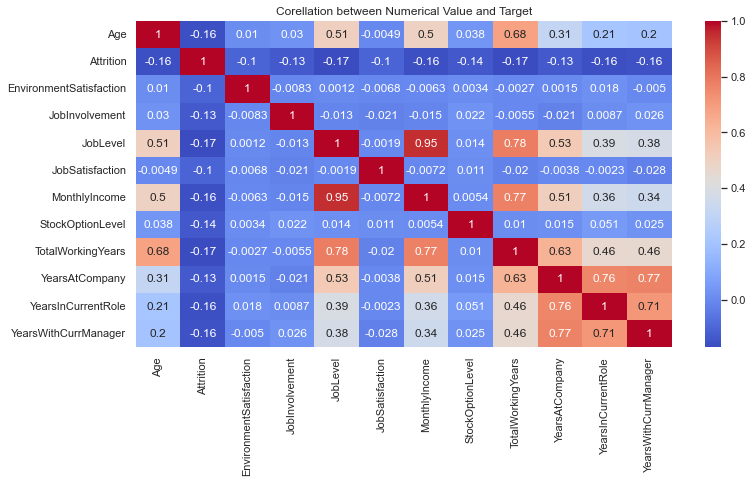

In [176]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
corr = new_df.corr()
plt.title("Corellation between Numerical Value and Target")
sns.heatmap(corr,annot=True,cmap="coolwarm")


## Outlier Handling

In [177]:
data_out = data.copy()

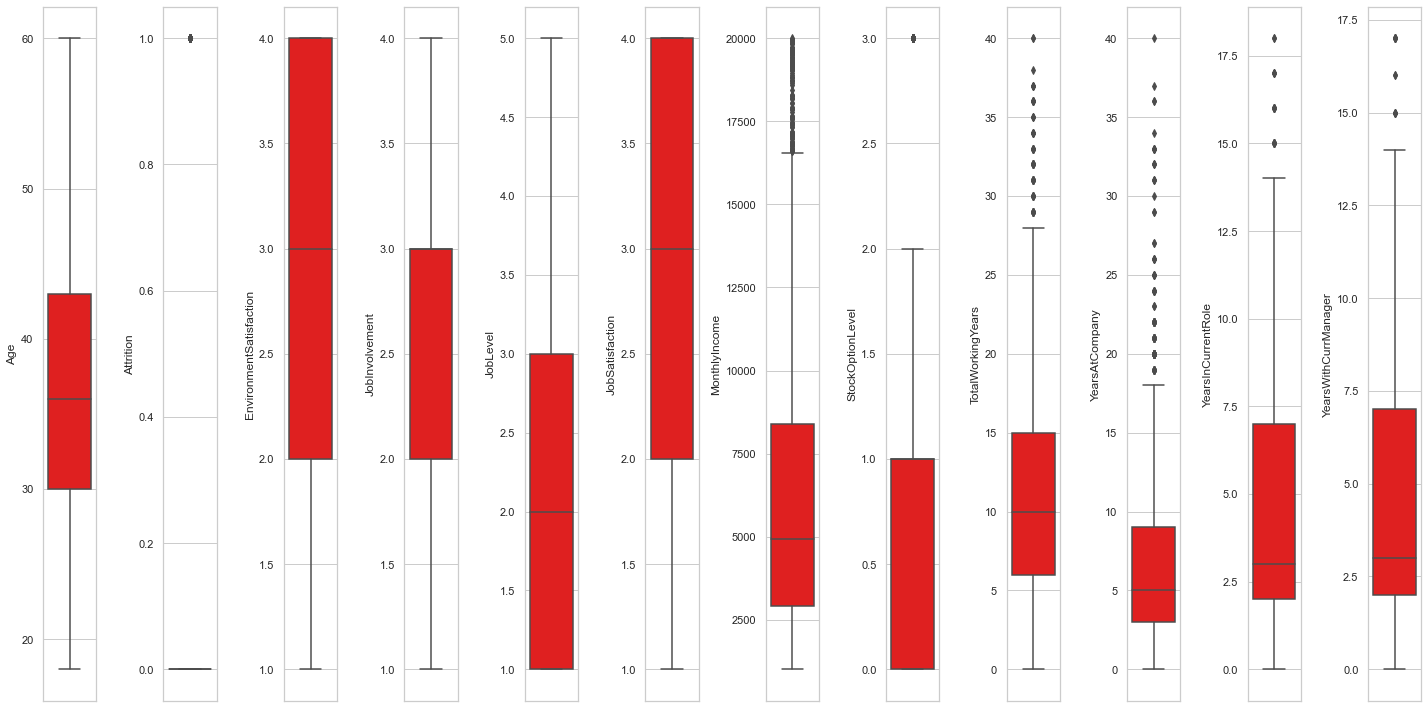

In [178]:
# Look Outlier in All data
features = Nums
plt.figure(figsize=(20,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data_out[features[i]], color = 'red')
    plt.tight_layout()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

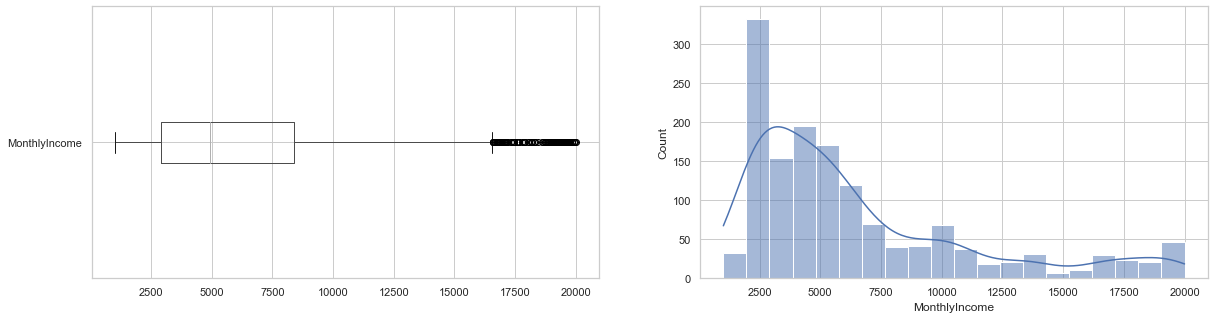

In [179]:
# Monthly Income
f,ax = plt.subplots(1, 2, figsize = (20,5))
data_out.boxplot(column=['MonthlyIncome'], vert = False, grid = True, ax=ax[0])
sns.histplot(data_out['MonthlyIncome'], kde = True, ax=ax[1])

In [180]:
# look over Quantile
Q1 = data_out['MonthlyIncome'].quantile(0.25)
Q1

Q3 = data_out['MonthlyIncome'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

lower_lim, upper_lim

(-5291.0, 16581.0)

In [181]:
upper_i = data_out[data_out['MonthlyIncome'] > 16500]

In [182]:
# Total Working Years

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

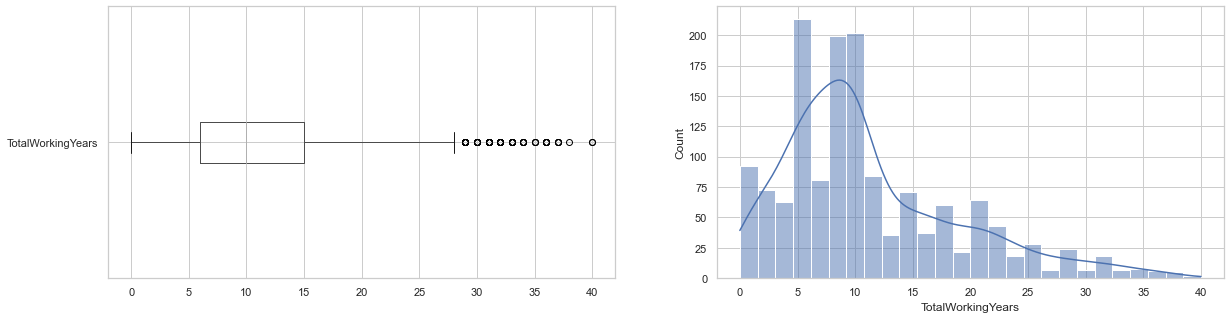

In [183]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
data_out.boxplot(column = ['TotalWorkingYears'], vert = False, grid = True, ax=ax[0])
sns.histplot(data_out['TotalWorkingYears'], kde = True, ax=ax[1])

In [184]:
# look over Quantile
Q1 = data_out['TotalWorkingYears'].quantile(0.25)
Q1

Q3 = data_out['TotalWorkingYears'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

lower_lim, upper_lim

(-7.5, 28.5)

In [185]:
tigapuluh1 = data_out[data_out['TotalWorkingYears'] > 30]

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

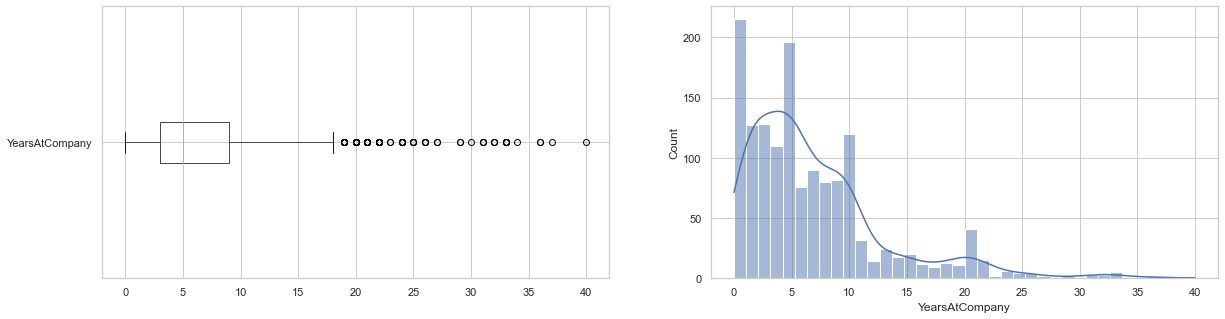

In [186]:
# Years at Company
f,ax = plt.subplots(1, 2, figsize = (20,5))
data_out.boxplot(column=['YearsAtCompany'], vert = False, grid = True, ax=ax[0])
sns.histplot(data_out['YearsAtCompany'], kde = True, ax=ax[1])

In [187]:
# look over Quantile
Q1 = data_out['YearsAtCompany'].quantile(0.25)
Q1

Q3 = data_out['YearsAtCompany'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

lower_lim, upper_lim

(-6.0, 18.0)

In [188]:
over18 = data_out[data_out['YearsAtCompany'] > 18]

In [189]:
data_out['YearsAtCompany'].clip(upper = 18, inplace = True)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

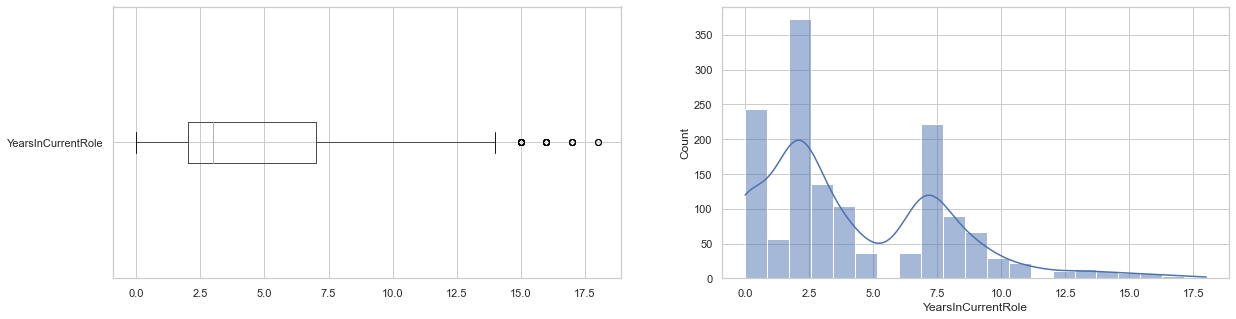

In [190]:
# Years in Current Role
f,ax = plt.subplots(1, 2, figsize = (20,5))
data_out.boxplot(column=['YearsInCurrentRole'], vert = False, grid = True, ax=ax[0])
sns.histplot(data_out['YearsInCurrentRole'], kde = True, ax=ax[1])

In [191]:
# look over Quantile
Q1 = data_out['YearsInCurrentRole'].quantile(0.25)
Q1

Q3 = data_out['YearsInCurrentRole'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

lower_lim, upper_lim

(-5.5, 14.5)

In [192]:
data_out['YearsInCurrentRole'].clip(upper = 15, inplace = True)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

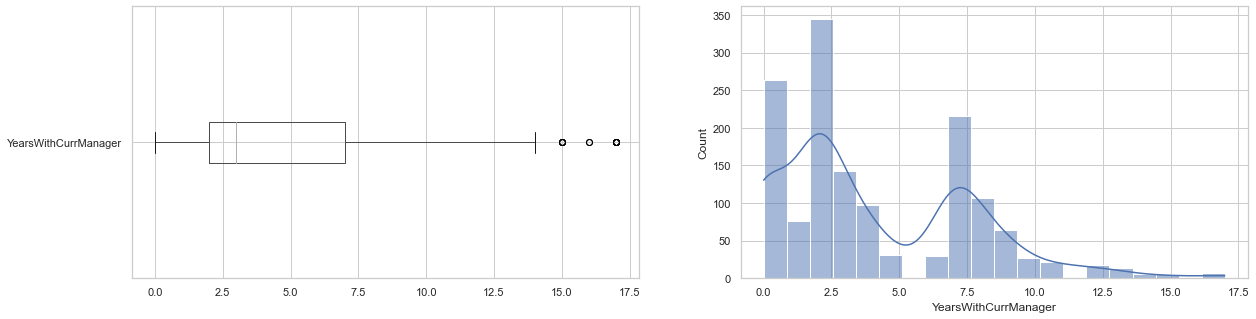

In [193]:
# Years With Curr Manager
f,ax = plt.subplots(1, 2, figsize = (20,5))
data_out.boxplot(column=['YearsWithCurrManager'], vert = False, grid = True, ax=ax[0])
sns.histplot(data_out['YearsWithCurrManager'], kde = True, ax=ax[1])

In [194]:
# look over Quantile
Q1 = data_out['YearsWithCurrManager'].quantile(0.25)
Q1

Q3 = data_out['YearsWithCurrManager'].quantile(0.75)
Q3

IQR = Q3 - Q1
IQR

lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

lower_lim, upper_lim

(-5.5, 14.5)

In [195]:
data_out['YearsWithCurrManager'].clip(upper = 15, inplace = True)

# Modeling 

***Modeling Purpose and Metrics that We Use***

We Try to minimize Employee that want to Attrition, and we want number of `False Negatives` 
(When we assume Employee will not Attrition, but they do Instead) `as small as possible`, so we use Recall as our key metrics

In [196]:
import warnings
warnings.filterwarnings('ignore')

# SMOTE
from imblearn.over_sampling import SMOTE 

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

## Training Data

In [197]:
X = data_out.drop(['Attrition'], axis = 1)
Y = data_out['Attrition']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=21)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1176, 35) (294, 35) (1176,) (294,)


In [199]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1176, 35) (294, 35) (1176,) (294,)


In [200]:
cly = [LogisticRegression(),
      RandomForestClassifier(),
      XGBClassifier(random_state=21)]

da = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])
da

Empty DataFrame
Columns: [Method, Recall, Precision, F1 Score, AUC]
Index: []

In [201]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_train)
    
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(y_train, preds)
    f1 = f1_score(y_train, preds)
    precision = precision_score(y_train, preds)
    recall = recall_score(y_train, preds)
    
    
    da = da.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [202]:
da

Method    Recall Precision  F1 Score       AUC
0      LogisticRegression  0.189474  0.666667  0.295082  0.585609
1  RandomForestClassifier       1.0       1.0       1.0       1.0
2           XGBClassifier       1.0       1.0       1.0       1.0

## Testing Data

In [203]:
att_train = pd.concat([X_train, y_train], axis=1)
corr = att_train.corr()

In [204]:
## Look After Redundant Feature

<AxesSubplot:title={'center':'Corellation between Numerical Value and Target'}>

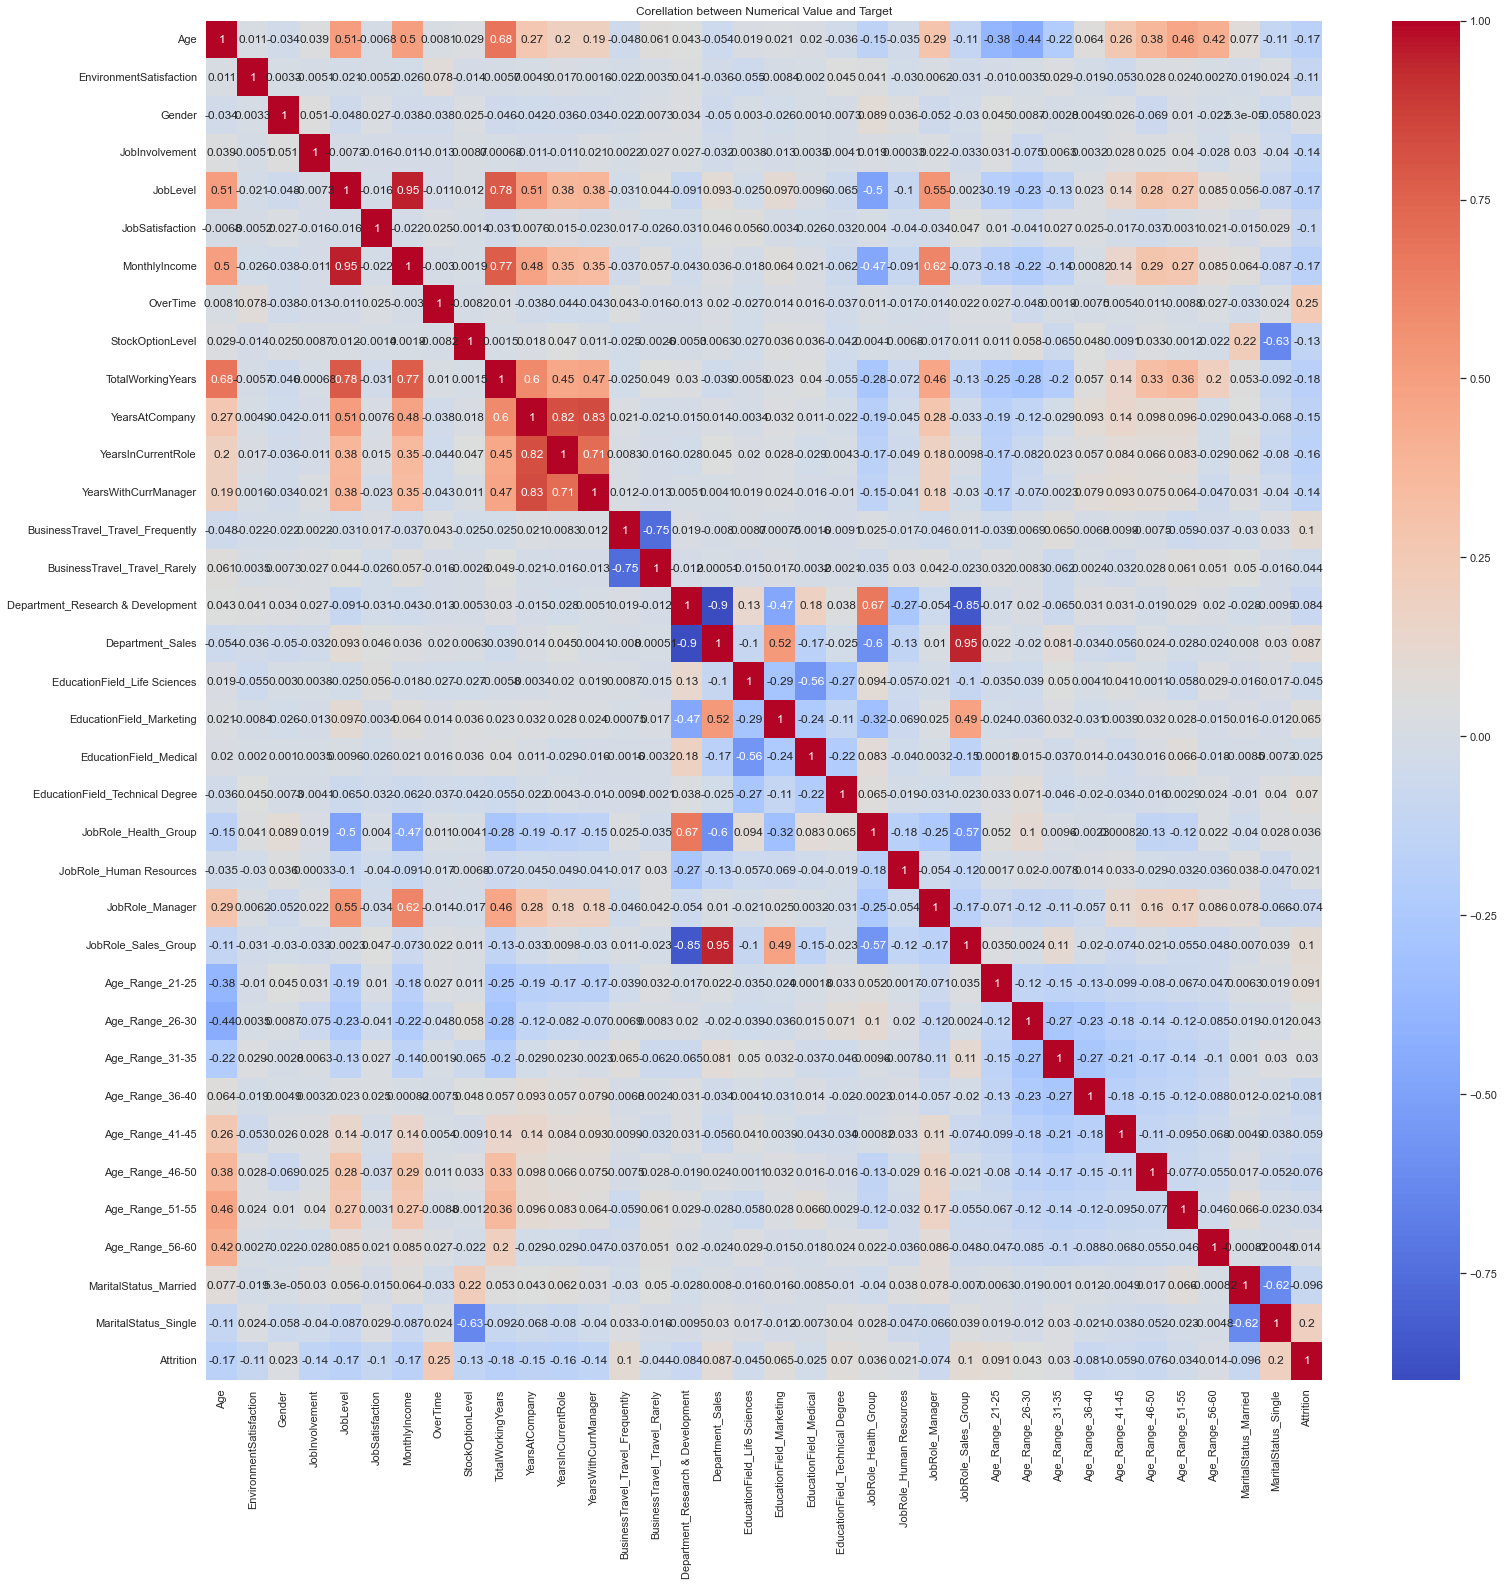

In [205]:
plt.figure(figsize=(25, 25))
sns.set(style="whitegrid")
corr = att_train.corr()
plt.title("Corellation between Numerical Value and Target")
sns.heatmap(corr,annot=True,cmap="coolwarm")


In [206]:
X_train = X_train.drop(columns = ['YearsAtCompany', 'YearsWithCurrManager','JobLevel'])
X_test = X_test.drop(columns = ['YearsAtCompany','YearsWithCurrManager','JobLevel'])

In [207]:
# Recheck heatmap #2
att_train = pd.concat([X_train, y_train], axis=1)
corr = att_train.corr()

<AxesSubplot:title={'center':'Corellation between Numerical Value and Target'}>

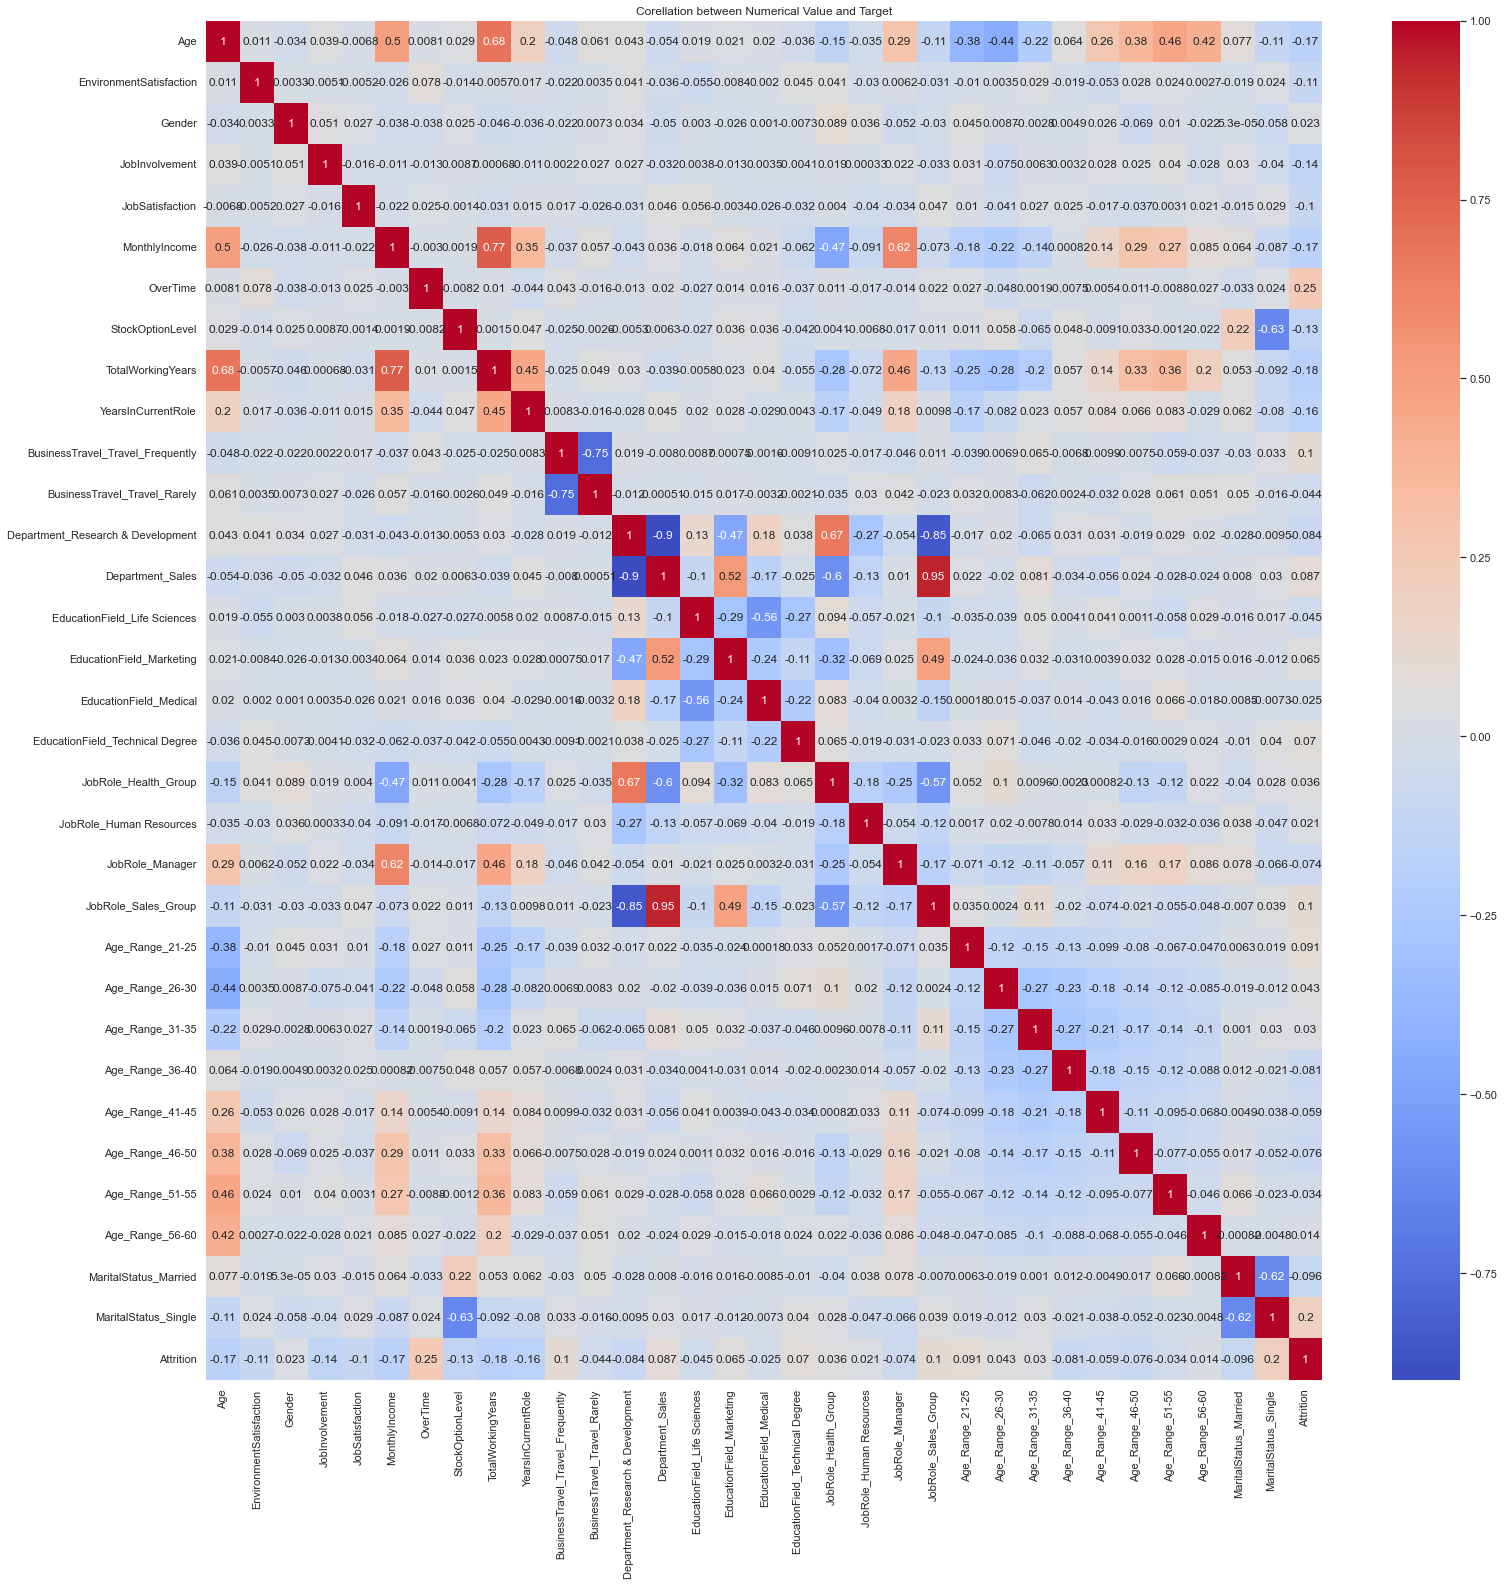

In [208]:
plt.figure(figsize=(25, 25))
sns.set(style="whitegrid")
corr = att_train.corr()
plt.title("Corellation between Numerical Value and Target")
sns.heatmap(corr,annot=True,cmap="coolwarm")


In [209]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1176, 32) (294, 32) (1176,) (294,)


In [210]:
cly = [LogisticRegression(),
      RandomForestClassifier(),
      XGBClassifier(random_state=21)]

dau = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])
dau

Empty DataFrame
Columns: [Method, Recall, Precision, F1 Score, AUC]
Index: []

In [211]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    
    
    dau = dau.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [212]:
dau

Method    Recall Precision  F1 Score       AUC
0      LogisticRegression  0.148936       0.7  0.245614  0.568395
1  RandomForestClassifier  0.212766  0.769231  0.333333   0.60031
2           XGBClassifier  0.425532  0.571429  0.487805  0.682402

In [213]:
cm = confusion_matrix(y_test, preds)
cm

array([[232,  15],
       [ 27,  20]], dtype=int64)

<AxesSubplot:>

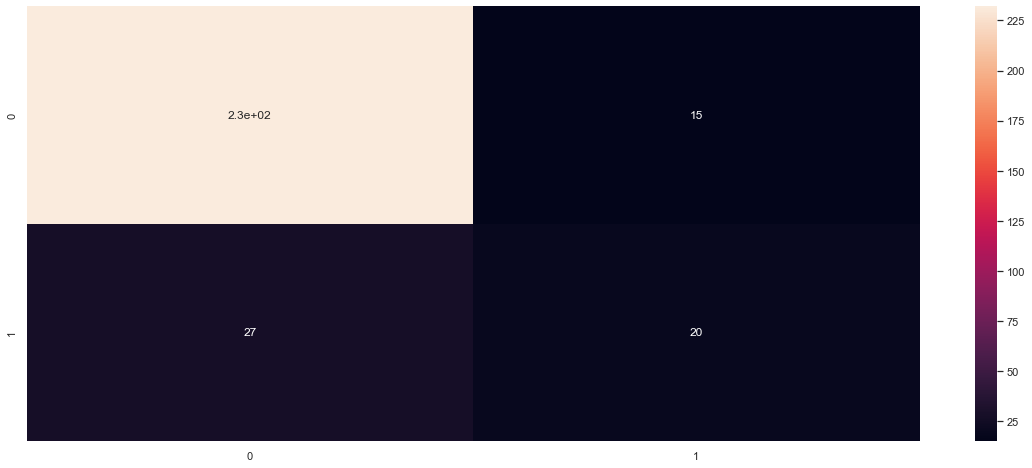

In [214]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot:>

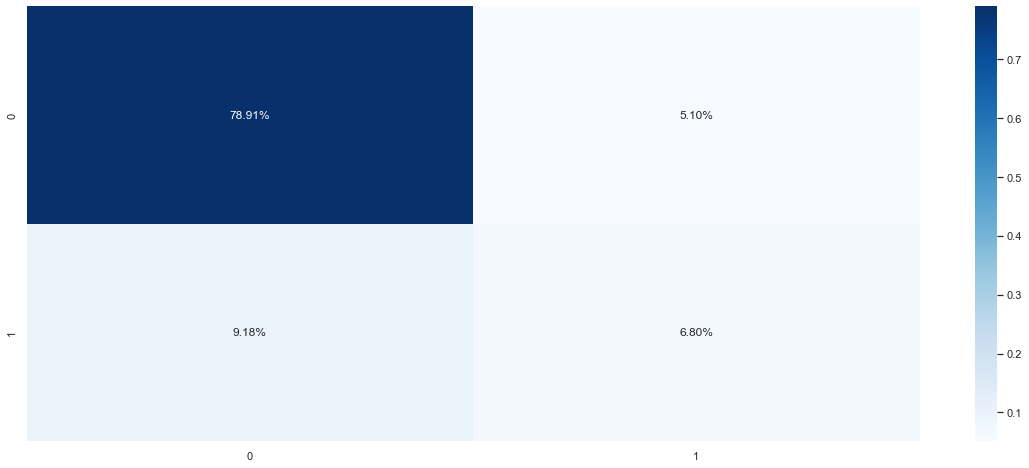

In [215]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

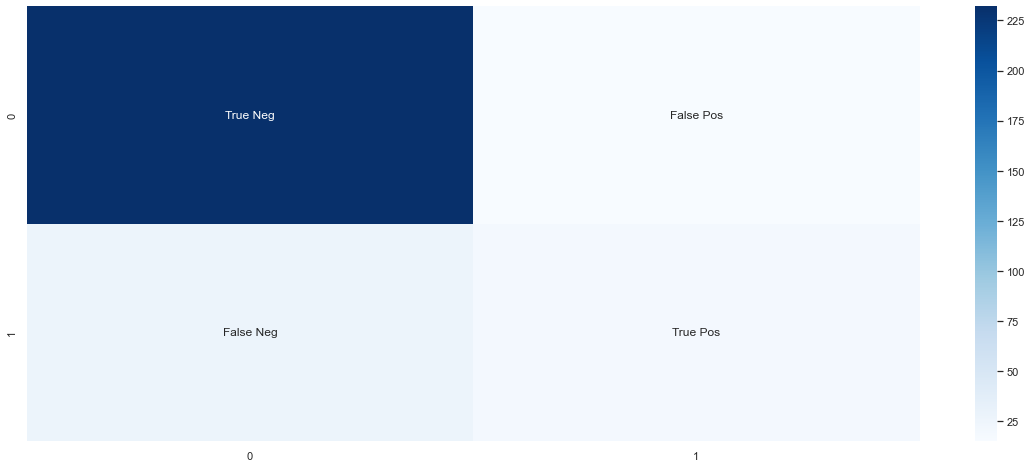

In [216]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

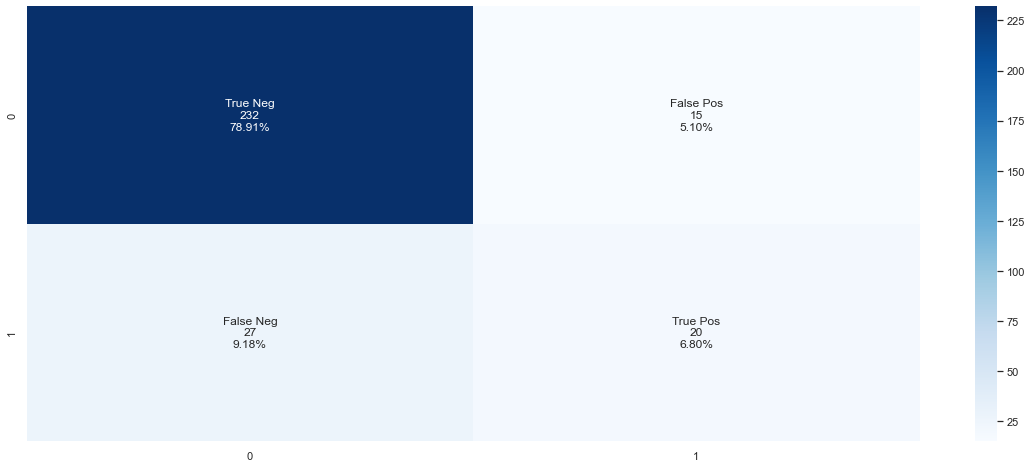

In [217]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

**This things happened because our data is Imbalanced**

### Random Forest Tuning

In [218]:
# random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=99)

In [219]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (20,40,60,80,100),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: total: 8.69 s
Wall time: 8.73 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (20, 40, 60, 80, 100)},
             scoring='recall')

In [220]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
21   {'max_depth': 5, 'n_estimators': 40}         0.105263                1
24  {'max_depth': 5, 'n_estimators': 100}         0.100000                2
22   {'max_depth': 5, 'n_estimators': 60}         0.094737                3
23   {'max_depth': 5, 'n_estimators': 80}         0.094737                3
20   {'max_depth': 5, 'n_estimators': 20}         0.094737                5
18   {'max_depth': 4, 'n_estimators': 80}         0.063158                6
19  {'max_depth': 4, 'n_estimators': 100}         0.057895                7
16   {'max_depth': 4, 'n_estimators': 40}         0.057895                7
17   {'max_depth': 4, 'n_estimators': 60}         0.052632                9
15   {'max_depth': 4, 'n_estimators': 20}         0.052632                9
14  {'max_depth': 3, 'n_estimators': 100}         0.047368               11
13   {'max_depth': 3, 'n_estimators': 80}         0.042105               12
12   {'max_depth': 3, 'n_estimators': 60}         0.036842               13
10   {'max_depth': 3, 'n_estimators': 20}         0.036842               13
11   {'max_depth': 3, 'n_estimators': 40}         0.031579               15
5    {'max_depth': 2, 'n_estimators': 20}         0.010526               16
9   {'max_depth': 2, 'n_estimators': 100}         0.005263               17
8    {'max_depth': 2, 'n_estimators': 80}         0.005263               17
7    {'max_depth': 2, 'n_estimators': 60}         0.005263               17
6    {'max_depth': 2, 'n_estimators': 40}         0.005263               17
4   {'max_depth': 1, 'n_estimators': 100}         0.000000               21
3    {'max_depth': 1, 'n_estimators': 80}         0.000000               21
2    {'max_depth': 1, 'n_estimators': 60}         0.000000               21
1    {'max_depth': 1, 'n_estimators': 40}         0.000000               21
0    {'max_depth': 1, 'n_estimators': 20}         0.000000               21

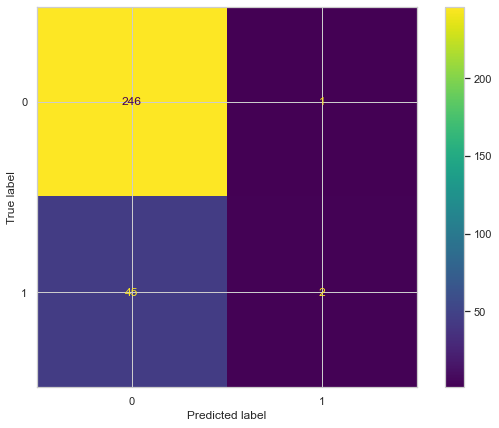

In [221]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [222]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91       247
           1       0.67      0.04      0.08        47

    accuracy                           0.84       294
   macro avg       0.76      0.52      0.50       294
weighted avg       0.82      0.84      0.78       294



Random Forest doesn't make significant Difference, 

look at the Recall between 0 and 1
its 1 : 0.15

### K-Nearest: Neighbors

In [223]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [224]:
# tune "weights" hyperparameter
# "uniform": standard measurement
# "distance": closer neighbor has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [225]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
1   {'n_neighbors': 2, 'weights': 'distance'}         0.210526   
5   {'n_neighbors': 4, 'weights': 'distance'}         0.100000   
7   {'n_neighbors': 5, 'weights': 'distance'}         0.100000   
3   {'n_neighbors': 3, 'weights': 'distance'}         0.089474   
9   {'n_neighbors': 6, 'weights': 'distance'}         0.089474   
11  {'n_neighbors': 7, 'weights': 'distance'}         0.084211   
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.078947   
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.078947   
13  {'n_neighbors': 8, 'weights': 'distance'}         0.073684   
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.057895   
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.031579   
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.031579   
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.026316   
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.005263   

    rank_test_score  
1                 1  
5                 2  
7                 2  
3                 4  
9                 4  
11                6  
2                 7  
6                 7  
13                9  
10               10  
0                11  
12               11  
4                13  
8                14

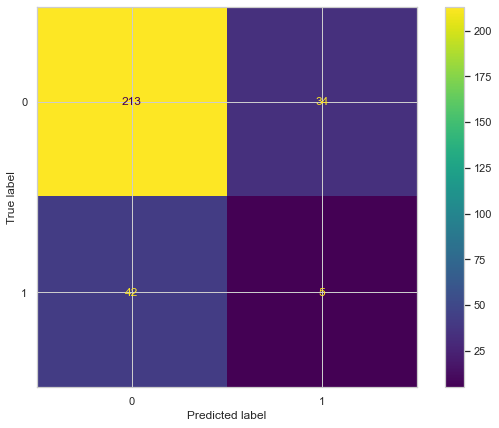

In [226]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [227]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       247
           1       0.13      0.11      0.12        47

    accuracy                           0.74       294
   macro avg       0.48      0.48      0.48       294
weighted avg       0.72      0.74      0.73       294



**KNN Also Same with Random Forest**

### Oversampling with SMOTE

In [228]:
# SMOTE
from imblearn.over_sampling import SMOTE 

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [229]:
sm = SMOTE(random_state=42)
X = data_out.drop(['Attrition'],axis = 1)
Y = data_out['Attrition']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1470, 35)
Shape of X after SMOTE: (2466, 35)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Attrition, dtype: float64

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1849, 35) (617, 35) (1849,) (617,)


In [231]:
cly = [LogisticRegression(),
      RandomForestClassifier(),
      XGBClassifier(random_state=42)]

du = pd.DataFrame(columns = ['Method', 'Accuracy','AUC','F1 Score','Precision','Recall'])
du

Empty DataFrame
Columns: [Method, Accuracy, AUC, F1 Score, Precision, Recall]
Index: []

In [232]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    
    # metrics
    auc = roc_auc_score(y_test, preds)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    
    du = du.append({'Method': method, 
                    'Accuracy': acc,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)
    
    
    

In [233]:
du

Method  Accuracy       AUC  F1 Score Precision    Recall
0      LogisticRegression  0.752026  0.751839  0.744574  0.761092  0.728758
1  RandomForestClassifier  0.902755  0.902407  0.897611  0.939286  0.859477
2           XGBClassifier  0.893031  0.892919  0.890728  0.902685  0.879085

**Conclusion and Business Recommendation to Reduce Attrition Tendency**:
- For Employee with Job Level 1-3, from Department (Sales and Research & Development) try to raise their Monthly Income / Salaries.
Especially for Employee with Job Level 2.
- For Employee with Age Range Around 18-36, try to give them Test to Level Up the Job Level / Promotion Test, before 5 Years of Work,
because Average Employee in this Group Range, have high tendency to do Attrition after 5 Years of Work.
- For Employee that Already work for 10 Years, try to asking them, do they want to Change Manager?
- For Employee that Already Divorced, try to ask them or doing survey, does they satisfy enough with work environment right now?
 If not satisfied enough, try to talk with them or think by yourself what can Company Improve

In [234]:
Level4

Age  Attrition     BusinessTravel              Department  \
706    40          1         Non-Travel                   Sales   
813    39          1  Travel_Frequently  Research & Development   
838    42          1  Travel_Frequently                   Sales   
975    55          1      Travel_Rarely                   Sales   
1223   47          1  Travel_Frequently                   Sales   

     EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
706   Life Sciences                        2  Female               4   
813   Life Sciences                        1    Male               3   
838   Life Sciences                        3    Male               3   
975       Marketing                        1    Male               4   
1223  Life Sciences                        3    Male               1   

      JobLevel       JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
706          4   Sales_Group                2        Single          13194   
813          4  Health_Group                4      Divorced          12169   
838          4   Sales_Group                1        Single          13758   
975          4   Sales_Group                3        Single          13695   
1223         4   Sales_Group                3       Married          12936   

     OverTime  StockOptionLevel  TotalWorkingYears  YearsAtCompany  \
706       Yes                 0                 22               1   
813        No                 3                 21              18   
838       Yes                 0                 22              21   
975       Yes                 0                 24              19   
1223       No                 0                 25              23   

      YearsInCurrentRole  YearsWithCurrManager Age_Range  
706                    0                     0     36-40  
813                    7                     5     36-40  
838                    9                    14     41-45  
975                    7                     8     51-55  
1223                   5                    10     46-50

In [235]:
Level5

Age  Attrition BusinessTravel              Department    EducationField  \
45    41          1  Travel_Rarely  Research & Development  Technical Degree   
568   55          1  Travel_Rarely  Research & Development           Medical   
595   58          1  Travel_Rarely  Research & Development     Life Sciences   
749   52          1  Travel_Rarely                   Sales         Marketing   
913   45          1  Travel_Rarely                   Sales         Marketing   

     EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
45                         2  Female               3         5   
568                        4    Male               3         5   
595                        4    Male               3         5   
749                        1  Female               1         5   
913                        1  Female               1         5   

            JobRole  JobSatisfaction MaritalStatus  MonthlyIncome OverTime  \
45   Director_Group                3       Married          19545       No   
568         Manager                1       Married          19859      Yes   
595  Director_Group                2        Single          19246      Yes   
749         Manager                4       Married          19845       No   
913         Manager                2        Single          18824      Yes   

     StockOptionLevel  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
45                  0                 23              22                  15   
568                 1                 24               5                   2   
595                 0                 40              31                  15   
749                 1                 33              32                  14   
913                 0                 26              24                  10   

     YearsWithCurrManager Age_Range  
45                      8     41-45  
568                     4     51-55  
595                     8     56-60  
749                     9     51-55  
913                    11     41-45

**Top Priority**, Minimize / Prevent Job Level 4 and 5 for Attrition
Why? Because getting Employee with Job Level 4 and 5 is very hard

Employee in Job Level 4 and 5 not thinking Monthy Income is their priority (their salary already very high), so this is what we can do :

1. For Employee with Job Level 4 try to reduce their Business Travel and their Working Hours, as we know Business Travel and Over Time have significant Impact for Tendency to do Attrition
2. For Employee with Jov Level 4 that Never/Rarely Travel try to improve their Environment and job Satisfaction by Asking them what can Company do to make them satisfied with that, Maybe they want to Change Manager after 10 Years of Work.
3. For Employee with Job Level 5 try to Improve their Environment and Job Satisfaction with reducing their Over Time / Working Hours.